In [1]:
# data processing
import pandas as pd 

# data visualization
import seaborn as sns
#matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator

#Statistics package
from scipy import stats

#Linear regression
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#Categorises according to the statistical significance
def stars(p):
    if p < 0.0001:
        return "****"
    elif (p < 0.001):
        return "***"
    elif (p < 0.01):
        return "**"
    elif (p < 0.05):
        return "*"
    else:
        return "ns"

In [2]:
df = pd.read_csv('Results.csv')
#Separate controls and all data
Control_df=df[df.P!='Control']
All_df=df
df=df[df.P!='Control']
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 395
Data columns (total 15 columns):
P                 342 non-null object
#                 342 non-null int64
Repeat_no         342 non-null float64
Control           342 non-null object
Date              342 non-null object
Age               342 non-null int64
Induction_time    342 non-null object
Lose_TR_time      342 non-null object
RR_beats          342 non-null float64
RR_breaths        342 non-null float64
SL                342 non-null float64
TT_movement       330 non-null object
TT_Recovery       330 non-null object
Recovery          342 non-null object
Exp               342 non-null object
dtypes: float64(4), int64(2), object(9)
memory usage: 42.8+ KB


In [3]:
#Inspect the first 5 rows 

from datetime import datetime

sequence = ['Induction_time','Lose_TR_time','TT_movement','TT_Recovery']

#Convert to seconds
for i in sequence:
    df[i+'_sec']=df[i].str[3:5].astype(float)*60+df[i].str[-2:].astype(float)
    df[i]=pd.to_datetime(df[i], format='%H:%M:%S')

df['Repeat_no'] = df['Repeat_no'].astype('int64')
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 395
Data columns (total 19 columns):
P                     342 non-null object
#                     342 non-null int64
Repeat_no             342 non-null int64
Control               342 non-null object
Date                  342 non-null object
Age                   342 non-null int64
Induction_time        342 non-null datetime64[ns]
Lose_TR_time          342 non-null datetime64[ns]
RR_beats              342 non-null float64
RR_breaths            342 non-null float64
SL                    342 non-null float64
TT_movement           330 non-null datetime64[ns]
TT_Recovery           330 non-null datetime64[ns]
Recovery              342 non-null object
Exp                   342 non-null object
Induction_time_sec    342 non-null float64
Lose_TR_time_sec      342 non-null float64
TT_movement_sec       330 non-null float64
TT_Recovery_sec       330 non-null float64
dtypes: datetime64[ns](4), float64(7), int64(3), object(5)
me

/home/jpo22/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/jpo22/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/jpo22/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,P,#,Repeat_no,Control,Date,Age,Induction_time,Lose_TR_time,RR_beats,RR_breaths,SL,TT_movement,TT_Recovery,Recovery,Exp,Induction_time_sec,Lose_TR_time_sec,TT_movement_sec,TT_Recovery_sec
0,1,1,1,N,15/07/2020,21,1900-01-01 00:00:21,1900-01-01 00:00:44,140.0,0.0,5.5,1900-01-01 00:01:09,1900-01-01 00:01:29,Y,Repeated dose,21.0,44.0,69.0,89.0
1,1,2,1,N,15/07/2020,21,1900-01-01 00:00:09,1900-01-01 00:01:06,94.0,0.0,5.5,1900-01-01 00:01:14,1900-01-01 00:01:27,Y,Repeated dose,9.0,66.0,74.0,87.0
2,1,3,1,N,15/07/2020,21,1900-01-01 00:00:16,1900-01-01 00:00:30,82.0,78.0,6.0,1900-01-01 00:01:13,1900-01-01 00:01:42,Y,Repeated dose,16.0,30.0,73.0,102.0
3,1,4,1,N,15/07/2020,21,1900-01-01 00:00:19,1900-01-01 00:00:29,140.0,144.0,5.0,1900-01-01 00:01:00,1900-01-01 00:01:15,Y,Repeated dose,19.0,29.0,60.0,75.0
4,1,5,1,N,15/07/2020,21,1900-01-01 00:00:45,1900-01-01 00:01:05,122.0,64.0,5.0,1900-01-01 00:01:11,1900-01-01 00:01:22,Y,Repeated dose,45.0,65.0,71.0,82.0


In [4]:
## Just stats!
protocol = ['4','5','6']
for j in protocol:

    
    for i,k in [('Induction_time_sec', 'Induction time (mm:ss)'),('Lose_TR_time_sec', 'Time taken to lose touch responsiveness (mm:ss)'),('TT_movement_sec', 'Time taken to regain movement (mm:ss)'),('TT_Recovery_sec','Time taken to recover (mm:ss)'),('RR_beats','Beats per minute at 5:00'),('RR_breaths', 'Breaths per minute at 5:00')]:
        p_df=df[df.P==j]
        #Multivariate linear regression with repeat number and size (SL) Fit an OLS model.        
        tips = p_df.dropna(how='all')
        tips.dropna(subset=[i], inplace=True)
        X = tips[['Repeat_no','SL']] 
        X_with_constant = sm.add_constant(X)
        Y = tips[i]
        model = sm.OLS(Y, X_with_constant).fit()
        predictions = model.predict(X_with_constant) 
        #Print results from the model
        print(k+' Protocol '+j)
        print(model.summary())
        
        #X_2=tips['SL'] 
        #Y_2=tips[i]
        #X_with_constant = sm.add_constant(X_2)
        #model_2 = sm.OLS(Y_2, X_with_constant).fit()
        #predictions = model_2.predict(X_with_constant) 
        #Print results from the model
        #print(k+' Protocol '+j+' JUST SL')
        #print(model_2.summary())
        
        
        #X = tips['SL'].values.reshape(-1, 1)  # values converts it into a numpy array
        #Y = tips[i].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
        #linear_regressor = LinearRegression()  # create object for the class
        #linear_regressor.fit(X, Y)  # perform linear regression
        #Y_pred = linear_regressor.predict(X)  # make predictions
        #print(linear_regressor.summary)
        #line, = plt.plot(X, Y_pred, color=colour)
        #print(i)
        #print(linear_regressor.coef_)
        
        
        print('******************************************************************')

Induction time (mm:ss) Protocol 4
                            OLS Regression Results                            
Dep. Variable:     Induction_time_sec   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     7.356
Date:                Fri, 21 Aug 2020   Prob (F-statistic):            0.00112
Time:                        10:03:54   Log-Likelihood:                -311.30
No. Observations:                  90   AIC:                             628.6
Df Residuals:                      87   BIC:                             636.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.6

/home/jpo22/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Time taken to lose touch responsiveness (mm:ss) Protocol 4
                            OLS Regression Results                            
Dep. Variable:       Lose_TR_time_sec   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     19.02
Date:                Fri, 21 Aug 2020   Prob (F-statistic):           1.41e-07
Time:                        10:03:54   Log-Likelihood:                -309.51
No. Observations:                  90   AIC:                             625.0
Df Residuals:                      87   BIC:                             632.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

/home/jpo22/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/jpo22/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1708: RuntimeWarning: invalid value encountered in double_scalars
  return self.mse_model/self.mse_resid
/home/jpo22/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/home/jpo22/anaconda3/lib/python3.7/site-packages/statsmodels/stats/stattools.py:46: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
/home/jpo22/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/jpo22/a

Beats per minute at 5:00 Protocol 4
                            OLS Regression Results                            
Dep. Variable:               RR_beats   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     4.480
Date:                Fri, 21 Aug 2020   Prob (F-statistic):             0.0141
Time:                        10:03:54   Log-Likelihood:                -473.50
No. Observations:                  90   AIC:                             953.0
Df Residuals:                      87   BIC:                             960.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22

                            OLS Regression Results                            
Dep. Variable:        TT_Recovery_sec   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     20.52
Date:                Fri, 21 Aug 2020   Prob (F-statistic):           1.12e-07
Time:                        10:03:54   Log-Likelihood:                -548.54
No. Observations:                  70   AIC:                             1103.
Df Residuals:                      67   BIC:                             1110.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2445.2406    202.585     12.070      0.0

Time taken to recover (mm:ss) Protocol 6
                            OLS Regression Results                            
Dep. Variable:        TT_Recovery_sec   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     61.98
Date:                Fri, 21 Aug 2020   Prob (F-statistic):           9.12e-17
Time:                        10:03:54   Log-Likelihood:                -561.24
No. Observations:                  80   AIC:                             1128.
Df Residuals:                      77   BIC:                             1136.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

In [5]:
protocol=['1','4','5','6']
for j in protocol:
    p_df=df[df.P==j]
    p_df_repeat1=p_df[p_df.Age==21]
    p_df_deaths=p_df[p_df.Recovery=='N']
    p_df_deaths=p_df_deaths[p_df_deaths['Repeat_no']>1]
    p_df_rep1=p_df[p_df.Age==21]
    print(' ')
    print(' ')
    print('Protocol '+j+' mean size: '+str(np.mean(p_df_repeat1['SL']))+'mean death size: '+str(np.mean(p_df_deaths['SL']))+' std: '+str(np.std(p_df_deaths['SL'])))
    
    print(' ')
    print('Protocol '+j+' beats per minute at day 0:'+str(np.mean(p_df_rep1['RR_beats']))+' breaths per minute at day 0:'+str(np.mean(p_df_rep1['RR_breaths'])))
    print(' ')
    print('Protocol '+j+' mean beats per minute:'+str(np.mean(p_df['RR_beats']))+' mean breaths per minute:'+str(np.mean(p_df['RR_breaths'])))
    print(' ')
    print('Protocol '+j+' mean TTI:'+str(np.mean(p_df['Induction_time_sec']))+' mean time taken to lose touch:'+str(np.mean(p_df['Lose_TR_time_sec'])))
    print(' ')
    print('Protocol '+j+' mean TRM:'+str(np.mean(p_df['TT_movement_sec']))+' mean time taken to recover:'+str(np.mean(p_df['TT_Recovery_sec'])))
    
    mean_size=[]
    p_df=df[df.P==j]
    for rep_no in np.arange(1,7):
        rep_df=p_df.query('Repeat_no == @rep_no')
        mean_size.append(np.mean(rep_df['SL']))

    l=[]
    for no in np.arange(1,6):
        l.append(mean_size[no]-mean_size[no-1])
        
    print('Protocol '+j+' mean_difference in size between repeats='+str(np.mean(l)))
        
        
    

 
 
Protocol 1 mean size: 5.45mean death size: nan std: nan
 
Protocol 1 beats per minute at day 0:110.6 breaths per minute at day 0:54.4
 
Protocol 1 mean beats per minute:144.57777777777778 mean breaths per minute:130.57777777777778
 
Protocol 1 mean TTI:90.1 mean time taken to lose touch:110.32222222222222
 
Protocol 1 mean TRM:69.28888888888889 mean time taken to recover:84.12222222222222
Protocol 1 mean_difference in size between repeats=1.02
 
 
Protocol 4 mean size: 5.4mean death size: nan std: nan
 
Protocol 4 beats per minute at day 0:0.0 breaths per minute at day 0:0.0
 
Protocol 4 mean beats per minute:64.32222222222222 mean breaths per minute:0.0
 
Protocol 4 mean TTI:17.477777777777778 mean time taken to lose touch:25.644444444444446
 
Protocol 4 mean TRM:198.42222222222222 mean time taken to recover:232.03333333333333
Protocol 4 mean_difference in size between repeats=1.095
 
 
Protocol 5 mean size: 5.75mean death size: 9.125 std: 0.649519052838329
 
Protocol 5 beats per 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


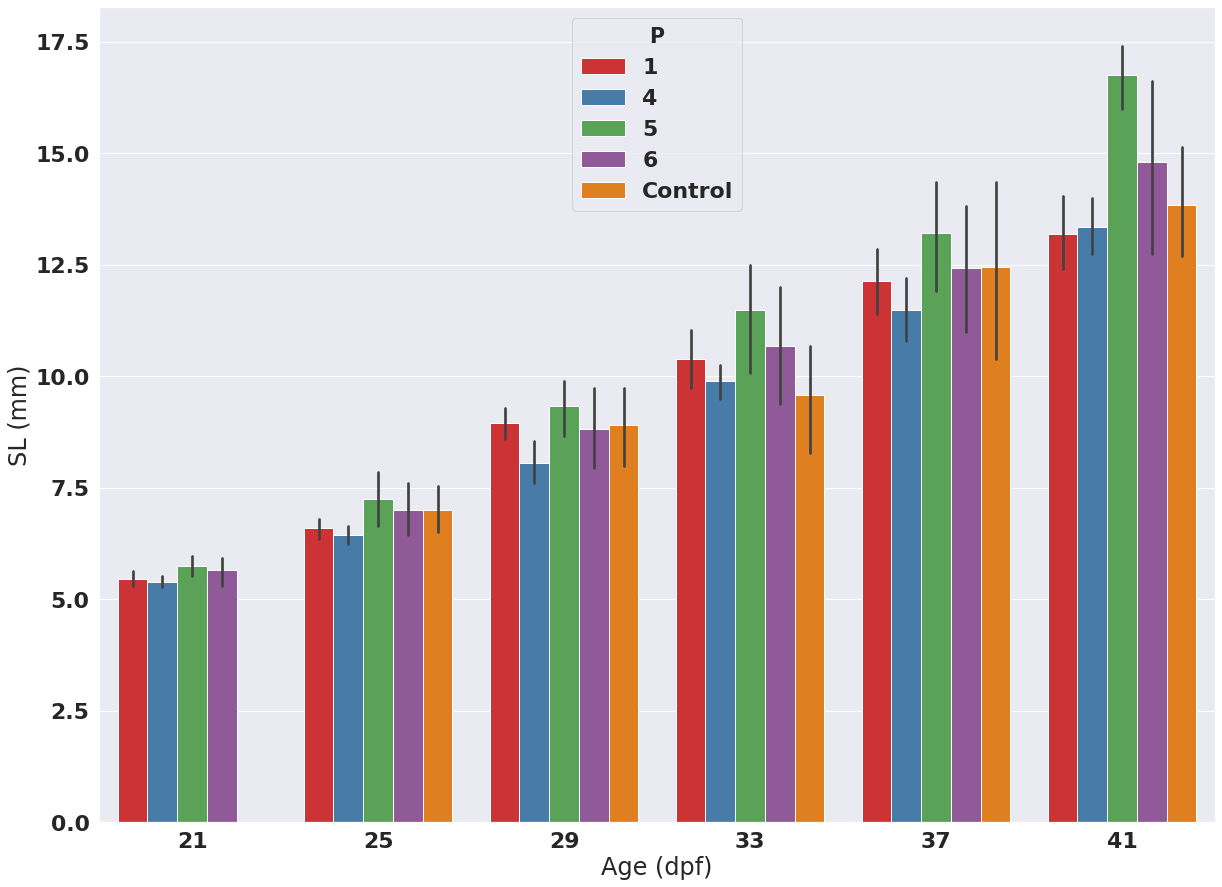

In [68]:
fig, axes = plt.subplots(figsize=(20, 15))

#Drop data points where repeat number is 1 as control
My_df = All_df.drop(All_df[(All_df.Repeat_no < 2) &  (All_df.Age > 21)].index)

My_df['Repeat_no'] = My_df['Repeat_no'].astype('str')
#Drop NA values
tips = My_df.dropna(how='all')       
ax=sns.barplot(y='SL', x='Age', 
                 data=tips, 
                 palette="Set1",
                 hue='P')



ax.set_xlabel('Age (dpf)')
ax.set_ylabel('SL (mm)')

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 40}

plt.rc('font', **font)

plt.savefig('Age_size.png', bbox_inches='tight')
plt.savefig('Age_size.eps', bbox_inches='tight')

Induction time (mm:ss)
[[1.00000000e+00 3.06442185e-21 3.49078043e-02 1.48789328e-03]
 [3.06442185e-21 1.00000000e+00 2.80230708e-15 1.02885606e-20]
 [3.49078043e-02 2.80230708e-15 1.00000000e+00 3.91174724e-01]
 [1.48789328e-03 1.02885606e-20 3.91174724e-01 1.00000000e+00]]
Time taken to lose touch responsiveness (mm:ss)
[[1.00000000e+00 3.87952992e-30 5.06672006e-02 3.16735265e-01]
 [3.87952992e-30 1.00000000e+00 1.22317278e-17 1.10040435e-24]
 [5.06672006e-02 1.22317278e-17 1.00000000e+00 2.79775741e-01]
 [3.16735265e-01 1.10040435e-24 2.79775741e-01 1.00000000e+00]]
Time taken to regain movement (mm:ss)
[[1.00000000e+00 9.31195647e-16 1.84677333e-25 2.76218269e-16]
 [9.31195647e-16 1.00000000e+00 1.27147125e-20 9.34571389e-08]
 [1.84677333e-25 1.27147125e-20 1.00000000e+00 4.61524595e-10]
 [2.76218269e-16 9.34571389e-08 4.61524595e-10 1.00000000e+00]]
Time taken to recover (mm:ss)
[[1.00000000e+00 1.40888265e-16 9.21795370e-30 1.39427692e-23]
 [1.40888265e-16 1.00000000e+00 3.40556

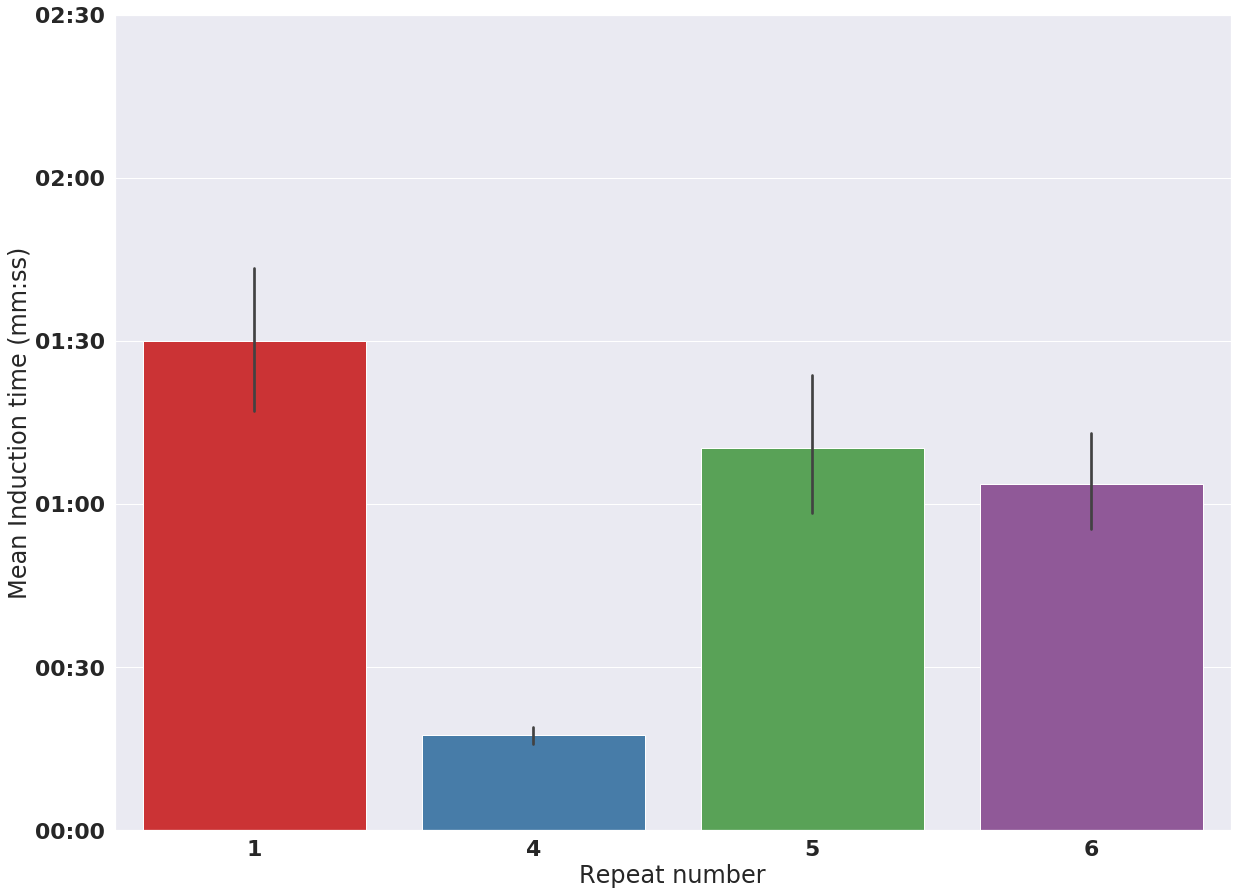

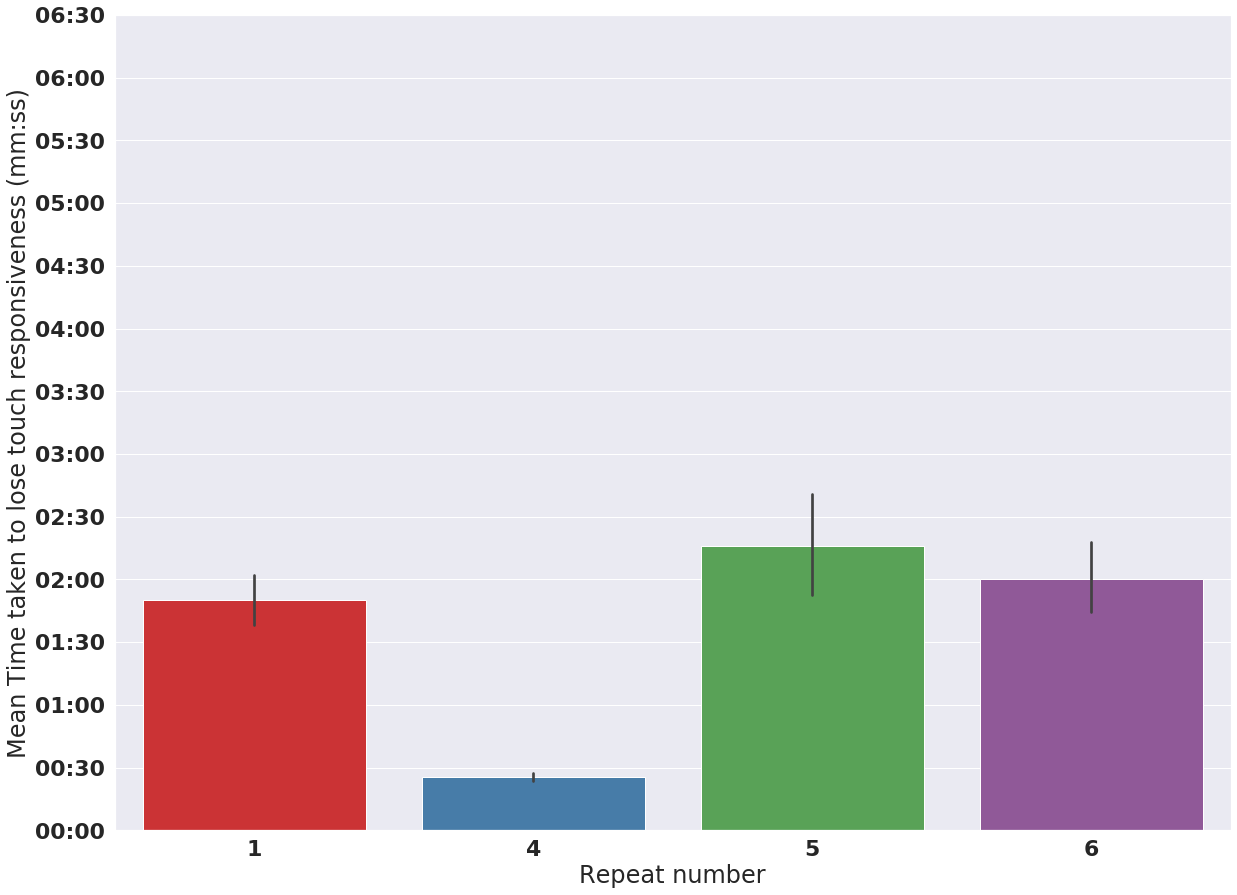

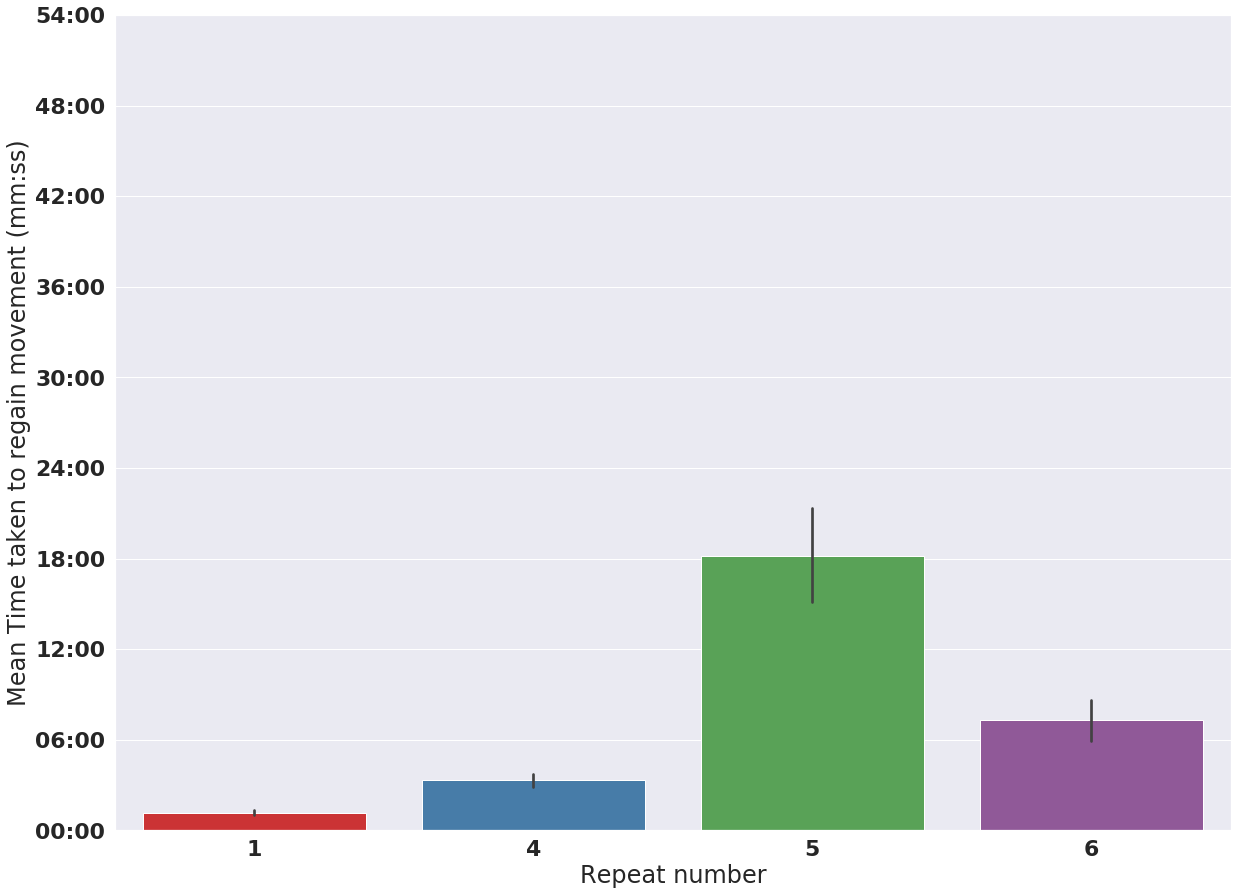

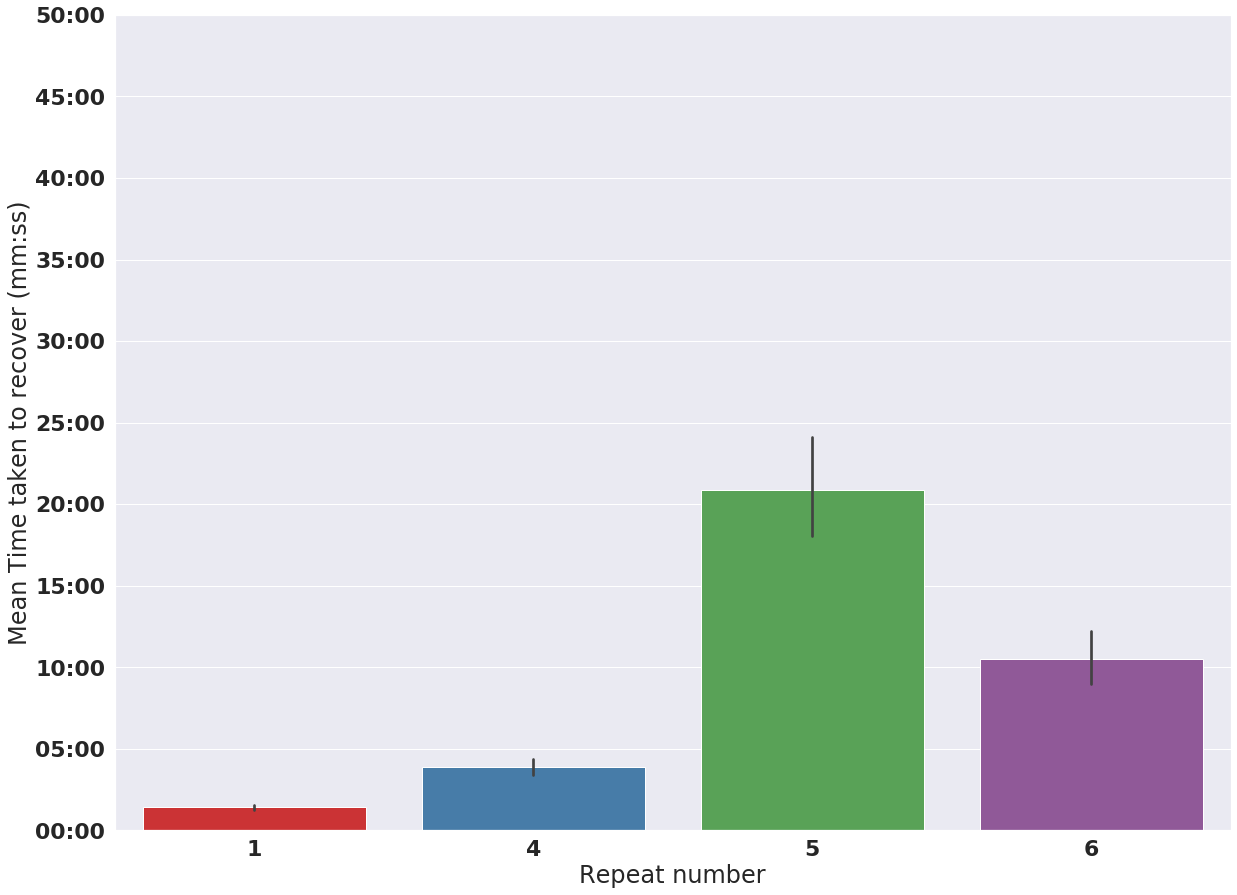

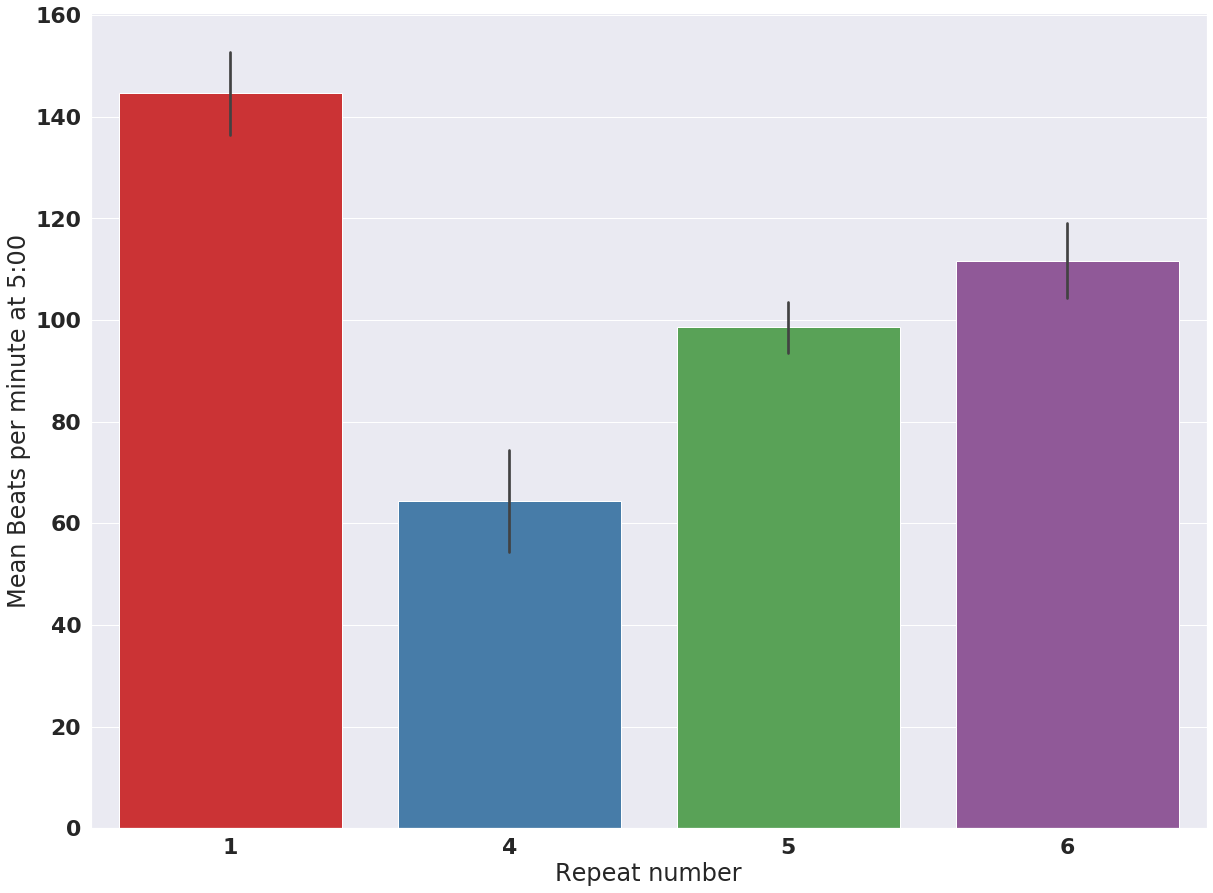

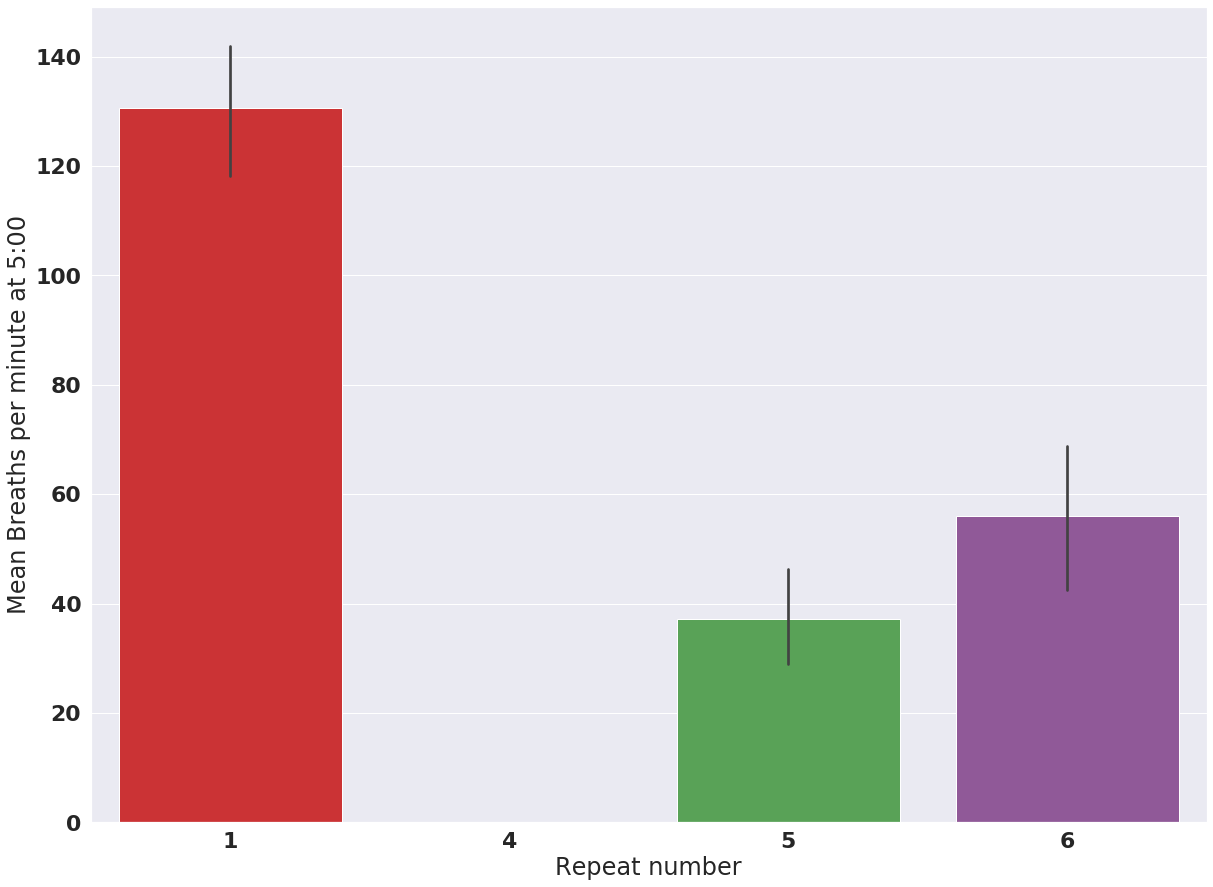

In [27]:
protocol=['1','4','5','6']

#Drop data points where repeat number is 1 as control
My_df = All_df.drop(All_df[(All_df.P=="Control")].index)
My_df['Repeat_no'] = My_df['Repeat_no'].astype('int64')

sequence = ['Induction_time','Lose_TR_time','TT_movement','TT_Recovery']

#Convert to seconds
for i in sequence:
    My_df[i+'_sec']=My_df[i].str[3:5].astype(float)*60+My_df[i].str[-2:].astype(float)

for i,k in [('Induction_time_sec', 'Induction time (mm:ss)'),('Lose_TR_time_sec', 'Time taken to lose touch responsiveness (mm:ss)'),('TT_movement_sec', 'Time taken to regain movement (mm:ss)'),('TT_Recovery_sec','Time taken to recover (mm:ss)'),('RR_beats','Beats per minute at 5:00'),('RR_breaths', 'Breaths per minute at 5:00')]:
    fig, axes = plt.subplots(figsize=(20, 15))  
    #Drop NA values
    tips = My_df.dropna(how='all') 
    X=tips['P']
    Y=tips[i]
    
    ##STATISTICAL SIGNIFICANCE SECTION
    #See if there is a significant difference between any repeat numbers 
    save_rep=[]
    t_mat=np.zeros((4,4))
    p_mat=np.zeros((4,4))
            
    for p_no in protocol:
        df_p=tips[tips.P==p_no]
                #save_rep contains the list of values in column 'i' for each repeat number.
        save_rep.append(df_p[i])
            
    for rep_i in np.arange(0,4):
        for rep_j in np.arange(0,4):
                    #All combinations of significance saved into an array!
            t_ij,p_ij=stats.ttest_ind(save_rep[rep_i],save_rep[rep_j], nan_policy='omit')
            t_mat[rep_i,rep_j]=t_ij
            p_mat[rep_i,rep_j]=p_ij
    print(k)
    print(p_mat)
    
        
    ax=sns.barplot(y=Y,x=X,palette="Set1",data=tips)
    #Define y limit and increments.
    if i!='RR_beats' and i!='RR_breaths':
        data_max=np.int(np.round(max(My_df[i]))/60)
        if data_max>9:
            #If greater than 9 then change the increment size.
            #in minutes
            inc=np.int(np.round(max(My_df[i])/600))
                    #Extra space for *
            y_lim_max=data_max
            y_actual_max=y_lim_max*60  
        elif data_max>=1:
                    #in minutes
            inc=0
                    #Extra space for *
            y_lim_max=data_max
            y_actual_max=y_lim_max*60
        else:
            data_max=max(My_df[i])/60
            inc=0.1
            y_lim_max=data_max
            y_actual_max=y_lim_max*60 
                 
        inc_star=60*inc
    else:
        inc_star=max([np.int(max(p_df[i])/10),1])

            
    if i!='RR_beats' and i!='RR_breaths':
                #Change the plot axis to time
        list=[]  
        if data_max>9:
            if y_lim_max>=60:
                ax.set(xlabel='Repeat Number', ylabel=k.replace('mm:ss','hh:mm:ss'))
                        #If greater than 60 then the time formatting needs to change
                for time in np.arange(y_lim_max, step=inc):
                    if time>=60:
                        if 60-time<9:
                            list.append('01:0'+str(np.int(time-60))+':00')
                        else:
                            list.append('01:'+str(np.int(time-60))+':00')
                    elif time>9:
                        list.append('00:'+str(np.int(time))+':00')
                    else:
                        list.append('00:0'+str(np.int(time))+':00')
            else:
                ax.set(xlabel='Repeat Number', ylabel=k)
                inc=np.int(inc)
                for time in np.arange(y_lim_max, step=inc):
                    if time>9:
                        list.append(str(time)+':00')
                    else:
                        list.append('0'+str(time)+':00')
            plt.yticks(np.arange(y_actual_max, step=inc*60), list)
        elif data_max>=1:
            ax.set(xlabel='Repeat Number', ylabel=k)
                #For small values add :30 increments.
            for time in np.arange(y_lim_max, step=1):
                list.append('0'+str(time)+':00')
                list.append('0'+str(time)+':30')
            plt.yticks(np.arange(y_actual_max, step=30), list)
        else: # Less than 1 minute
            ax.set(xlabel='Repeat Number', ylabel=k)
            for time in np.arange(y_lim_max*60, step=10):
                if time>0:
                    list.append('00:'+str(np.int(time)))   
                else:
                    list.append('00:00') 
            plt.yticks(np.arange(y_actual_max, step=10), list)
    else:
        ax.set(xlabel='Repeat Number', ylabel=k)

    font = {'family' : 'normal',
            'weight' : 'bold',
            'size'   : 100}
    ax.set_xlabel('Repeat number')
    ax.set_ylabel('Mean '+ k)



    plt.rc('font', **font)

    plt.savefig(i+'.png', bbox_inches='tight')
    plt.savefig(i+'.eps', bbox_inches='tight')

1
4
5
6


/home/jpo22/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/jpo22/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/jpo22/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the r

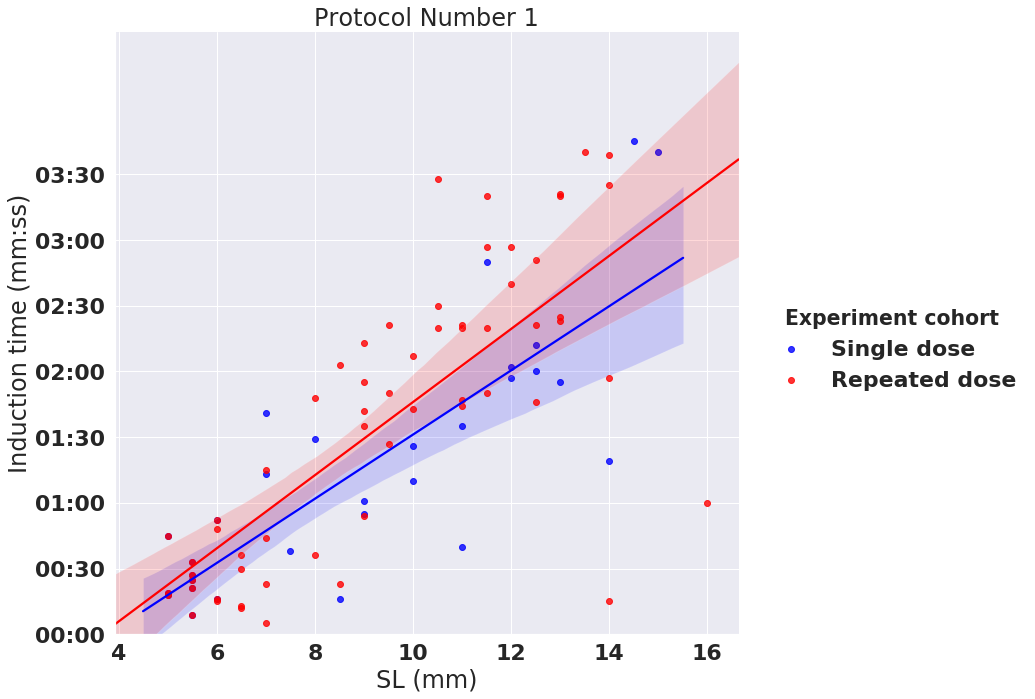

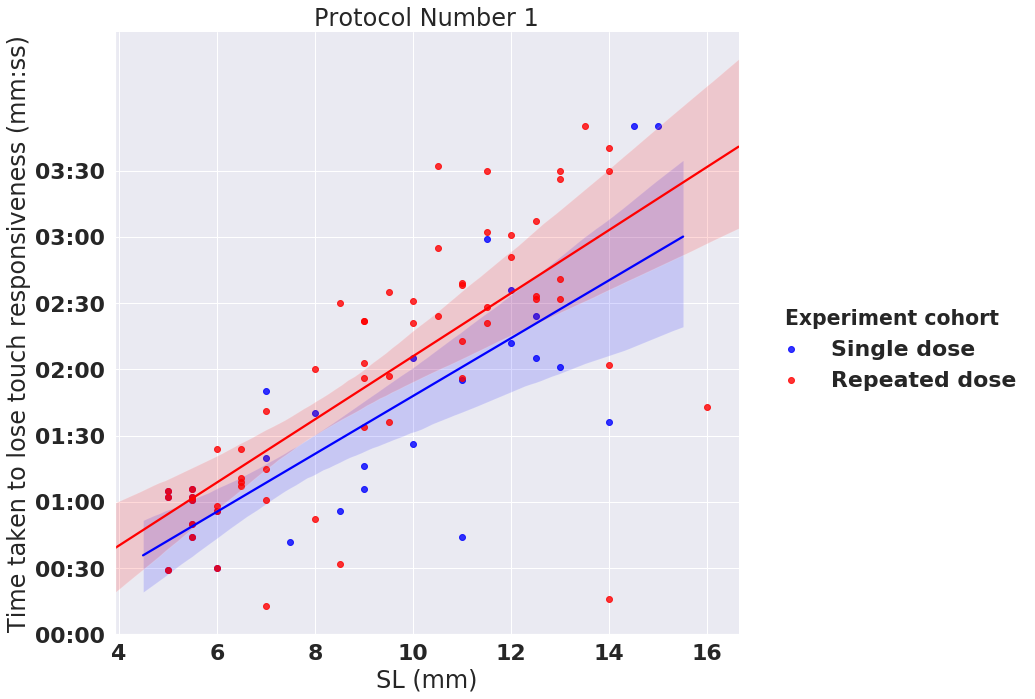

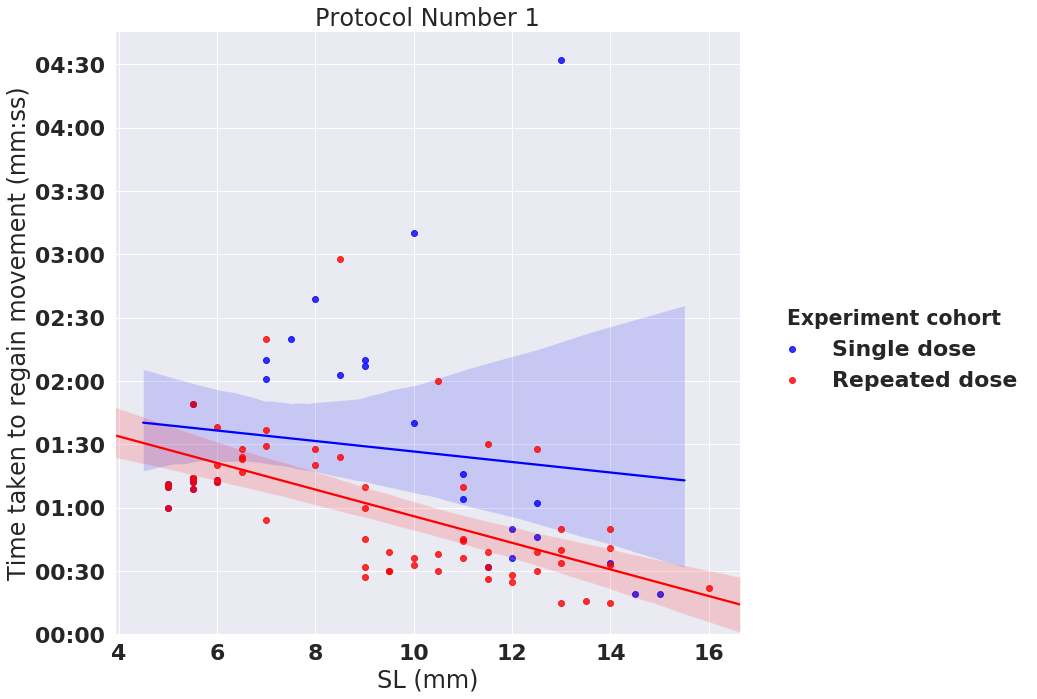

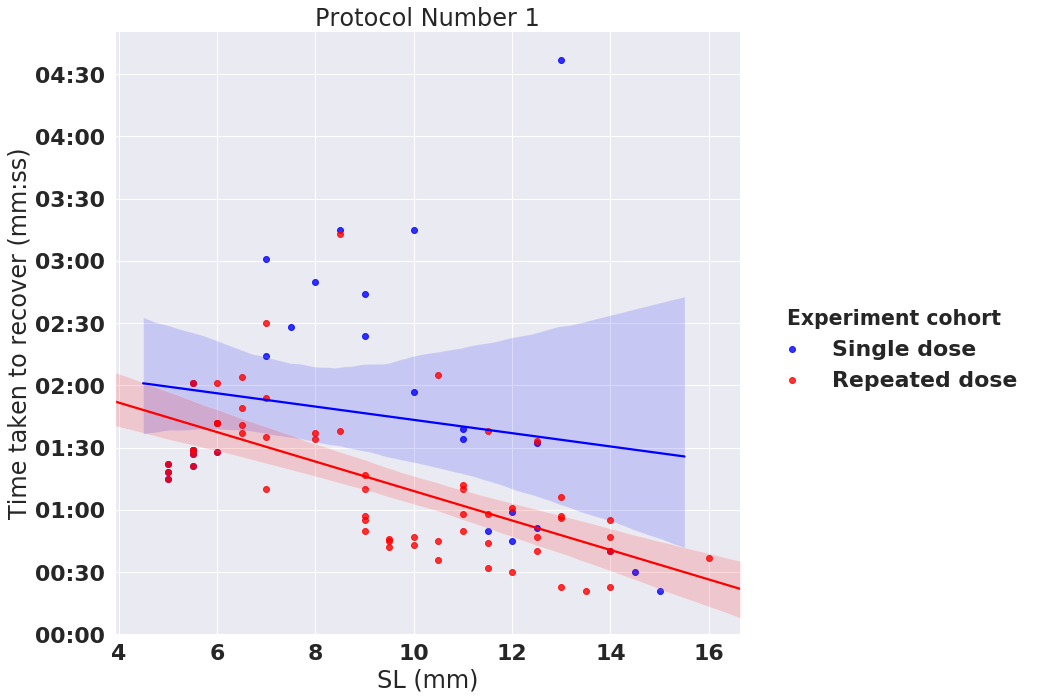

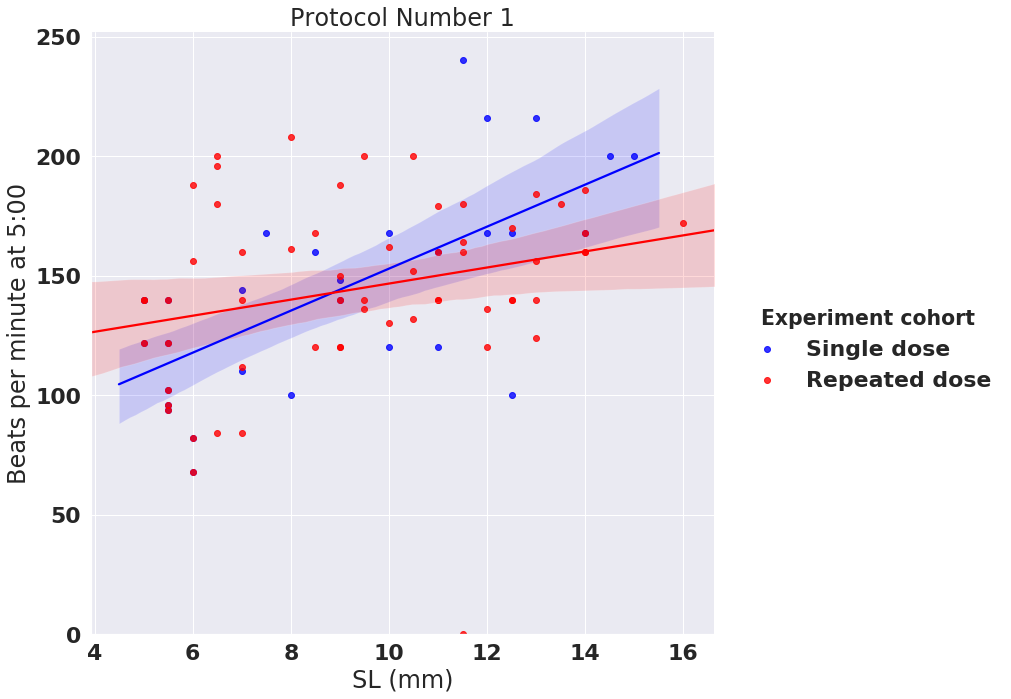

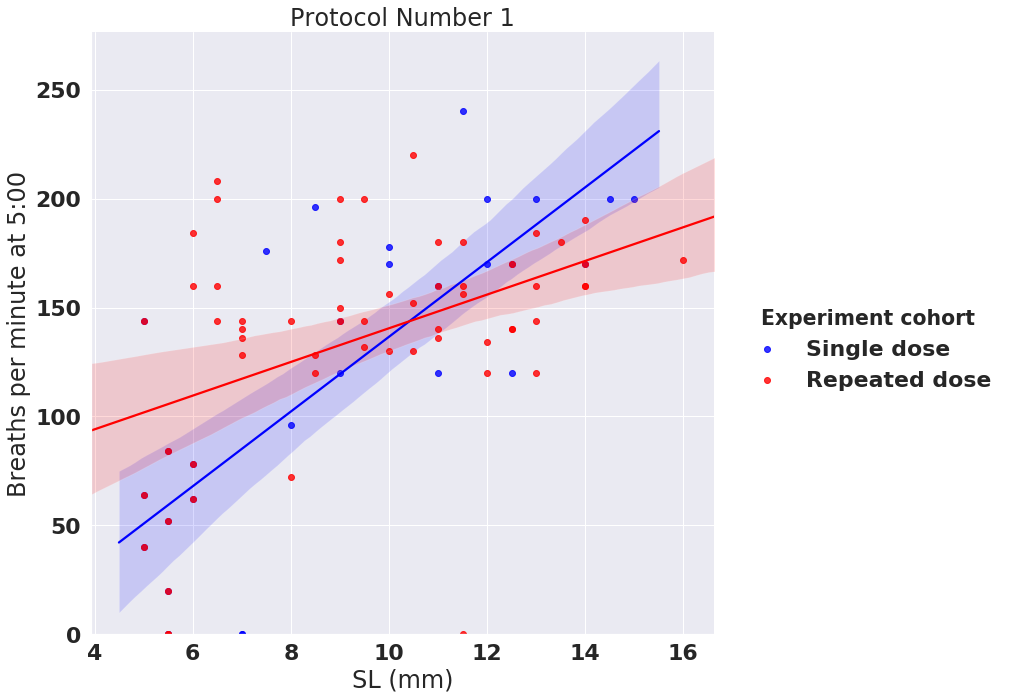

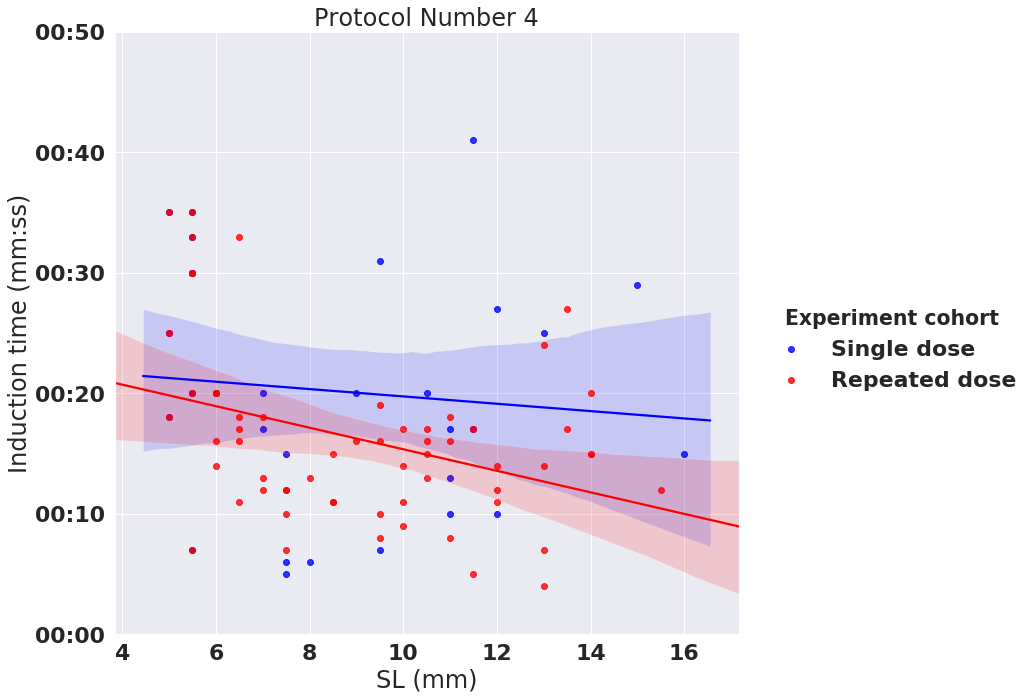

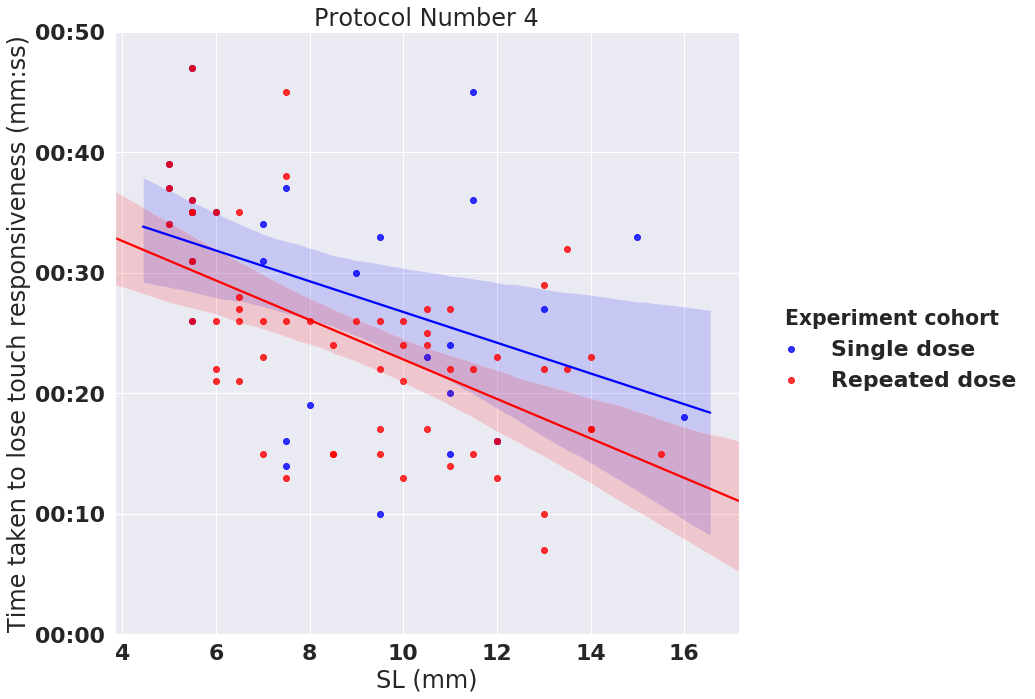

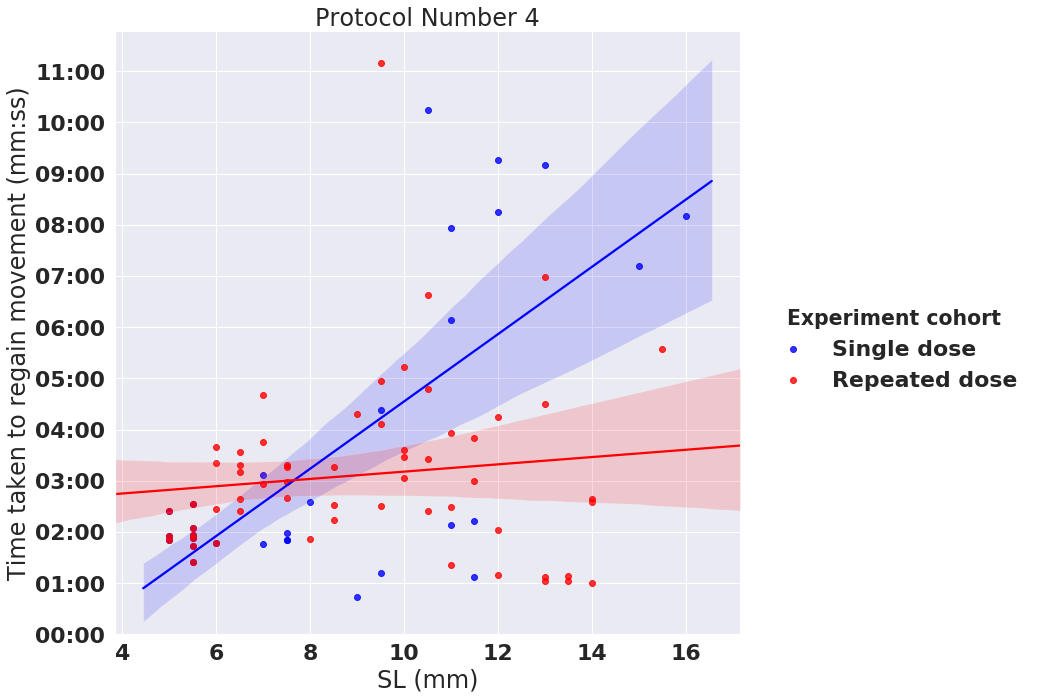

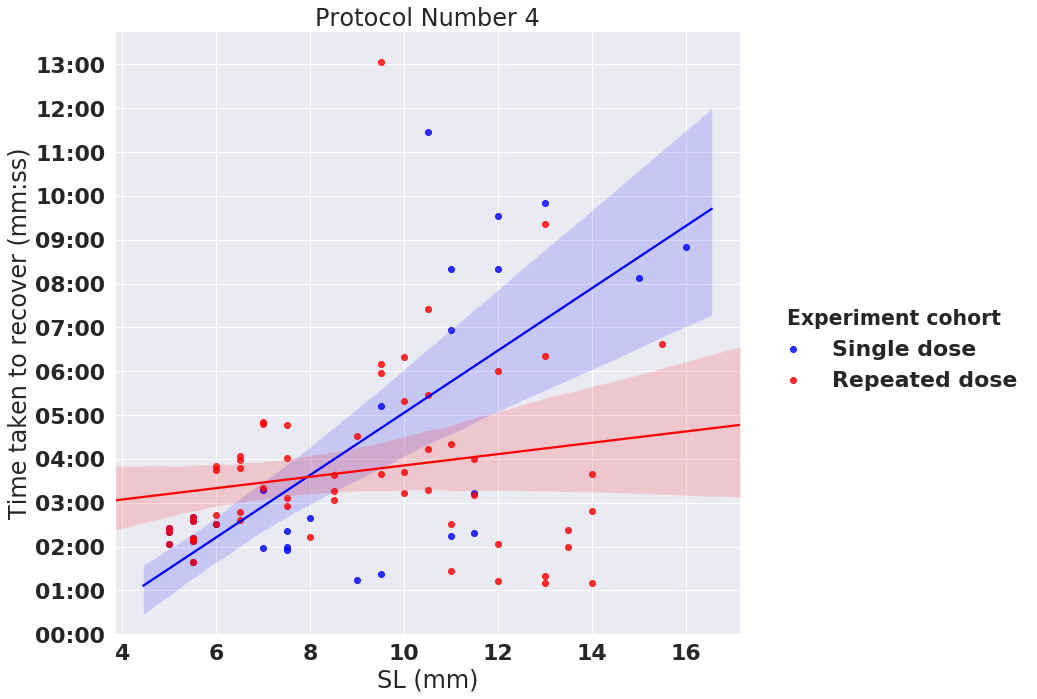

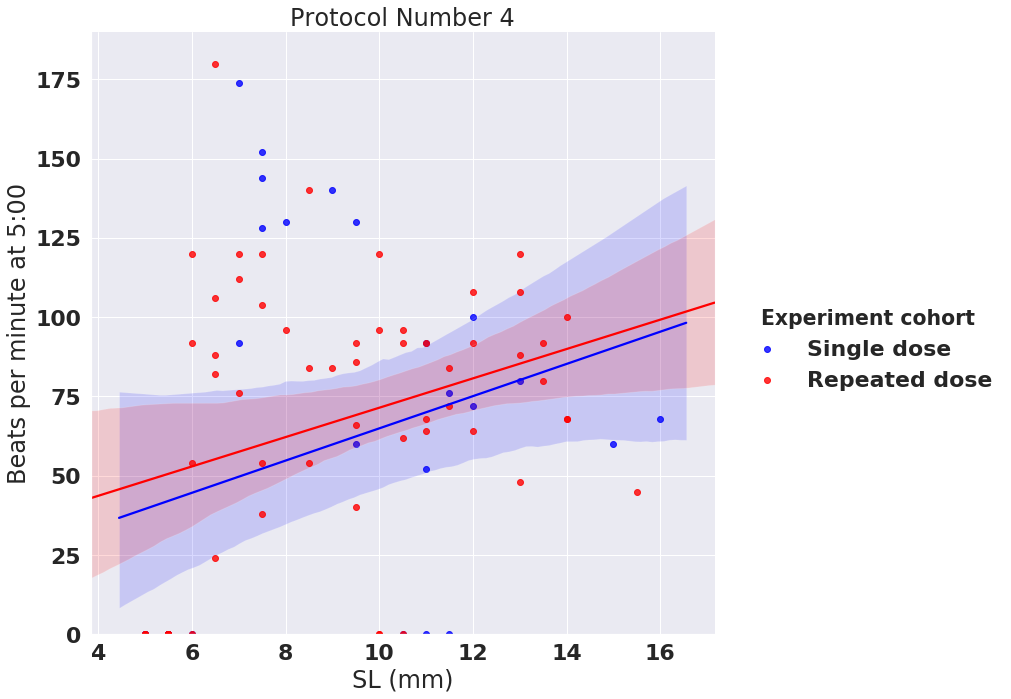

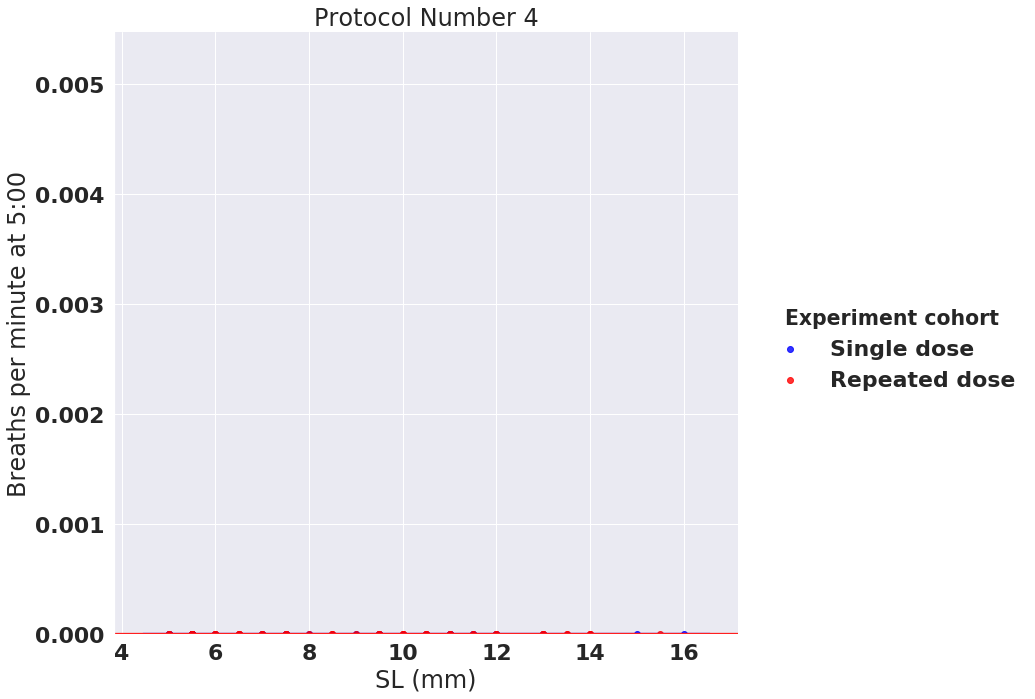

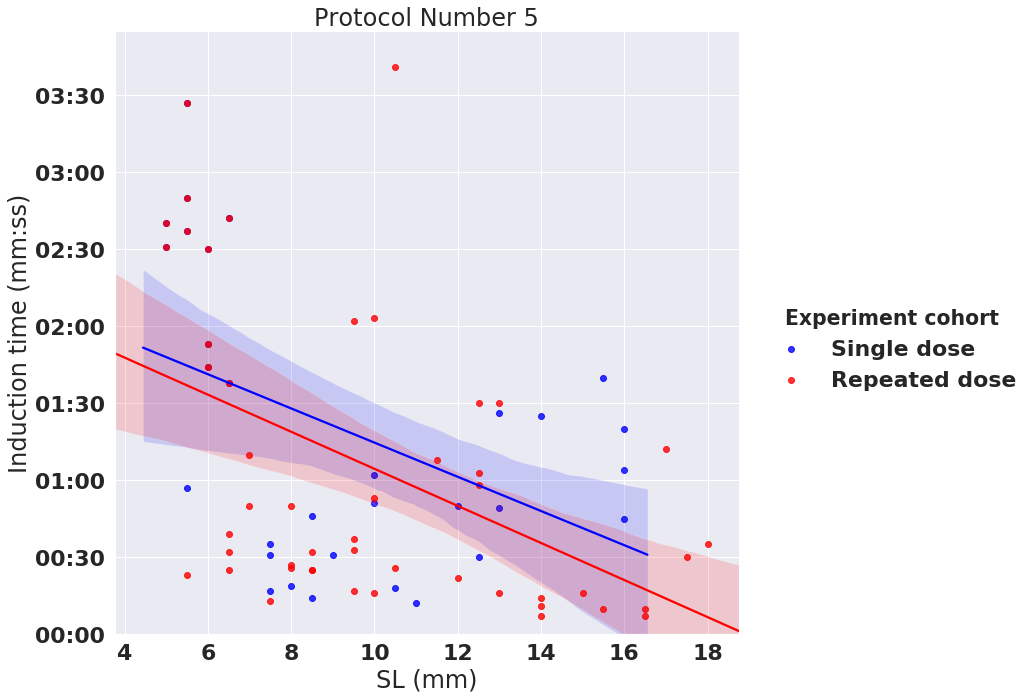

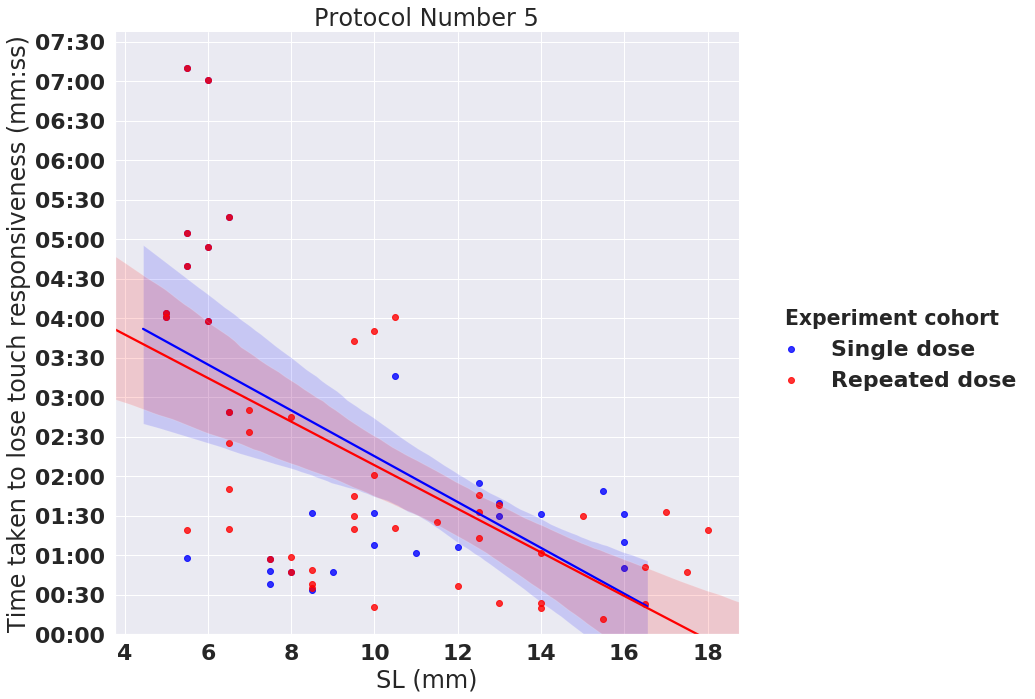

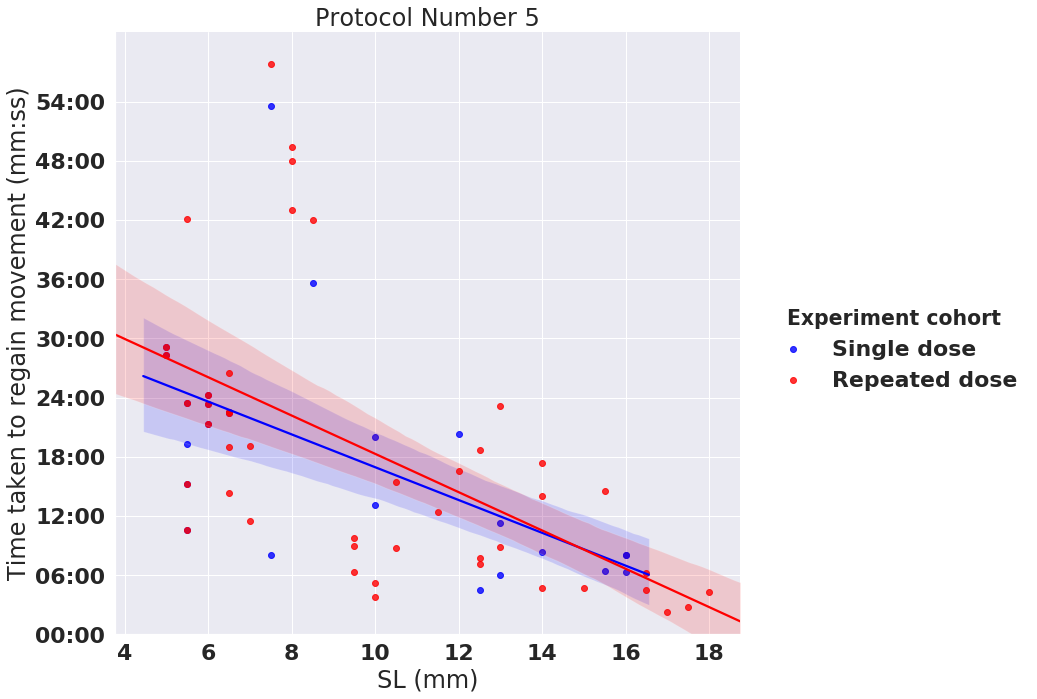

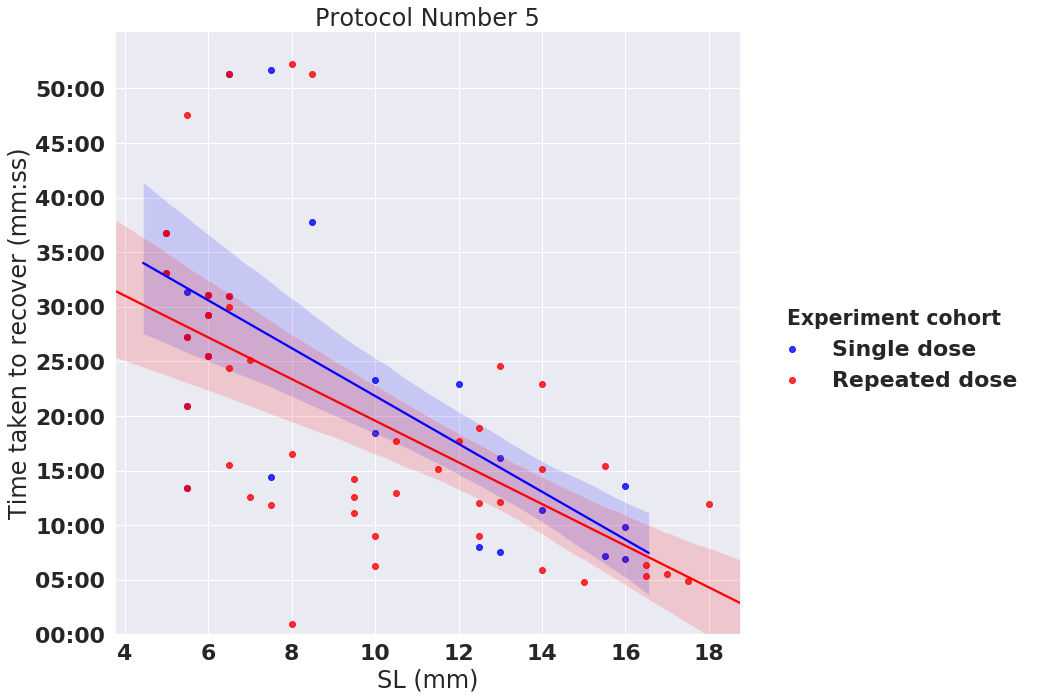

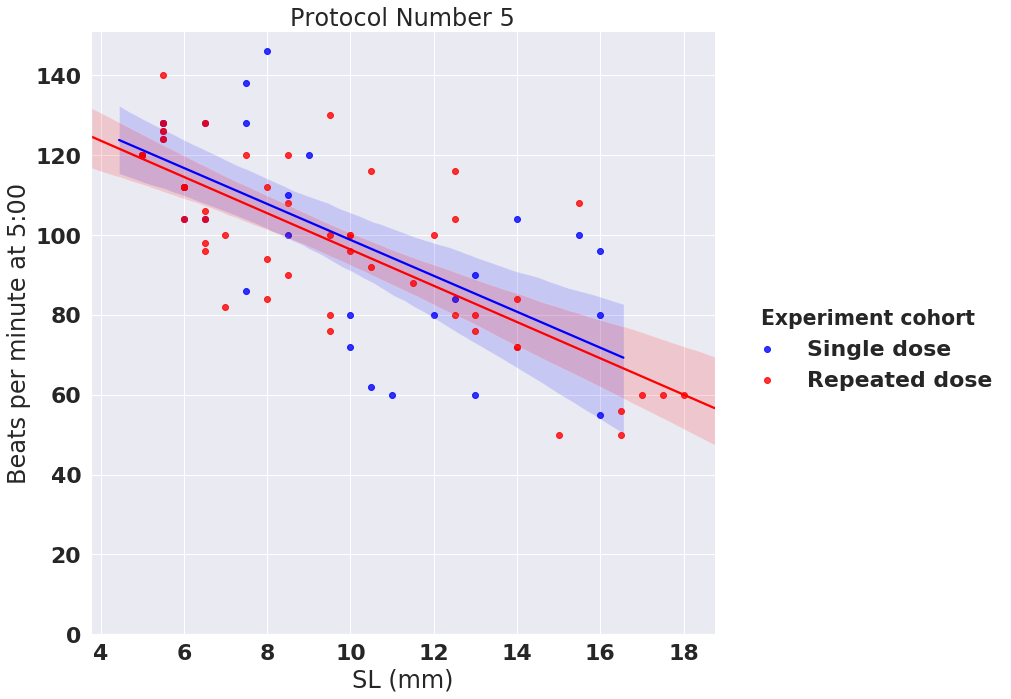

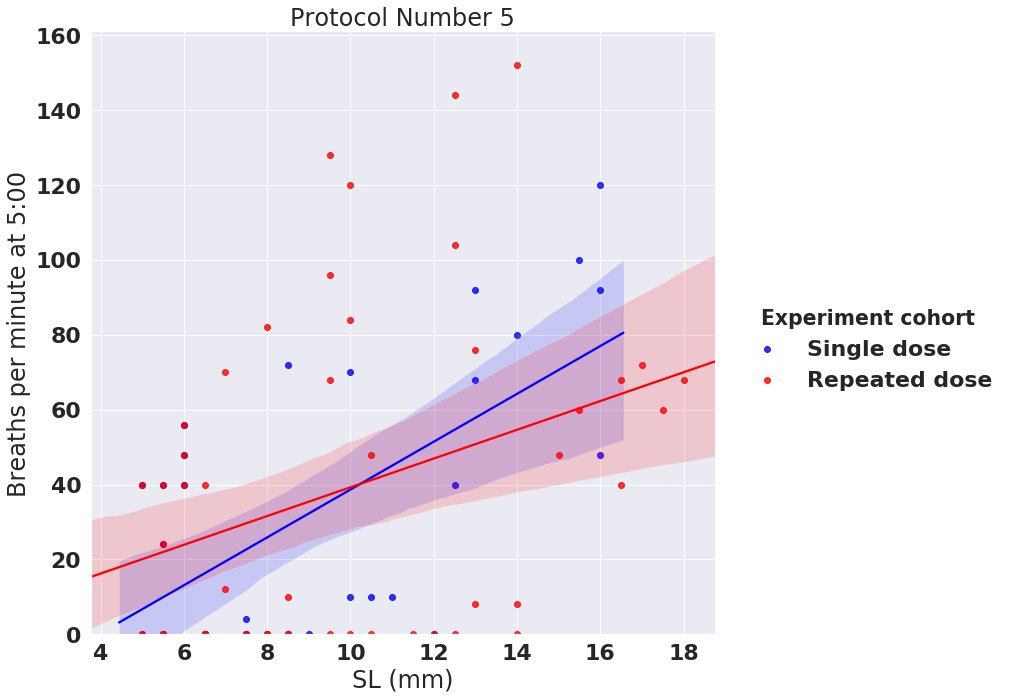

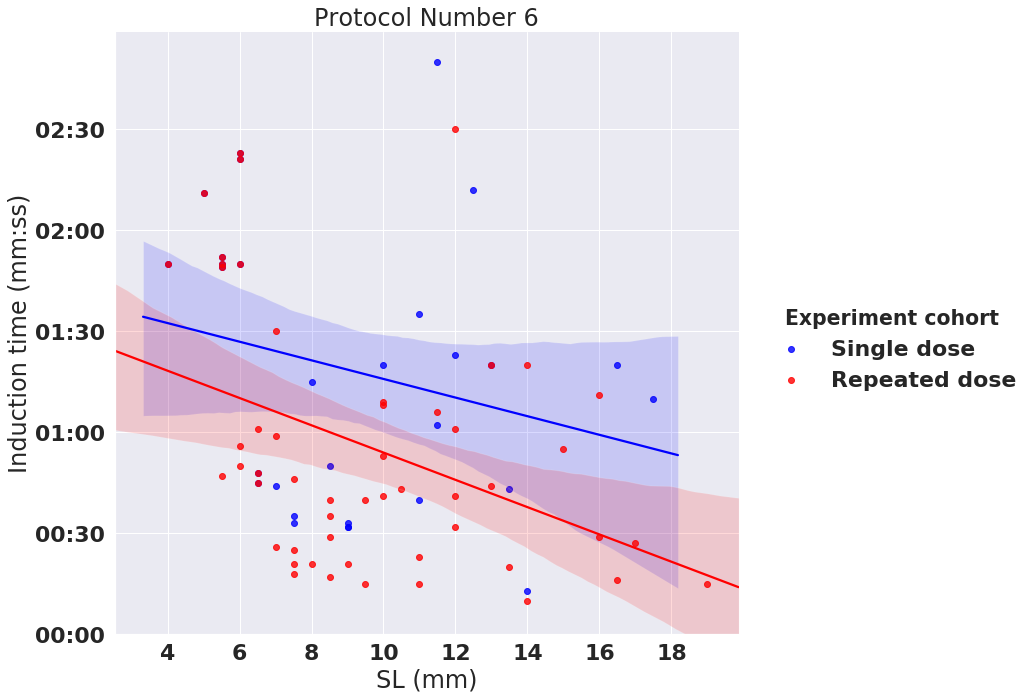

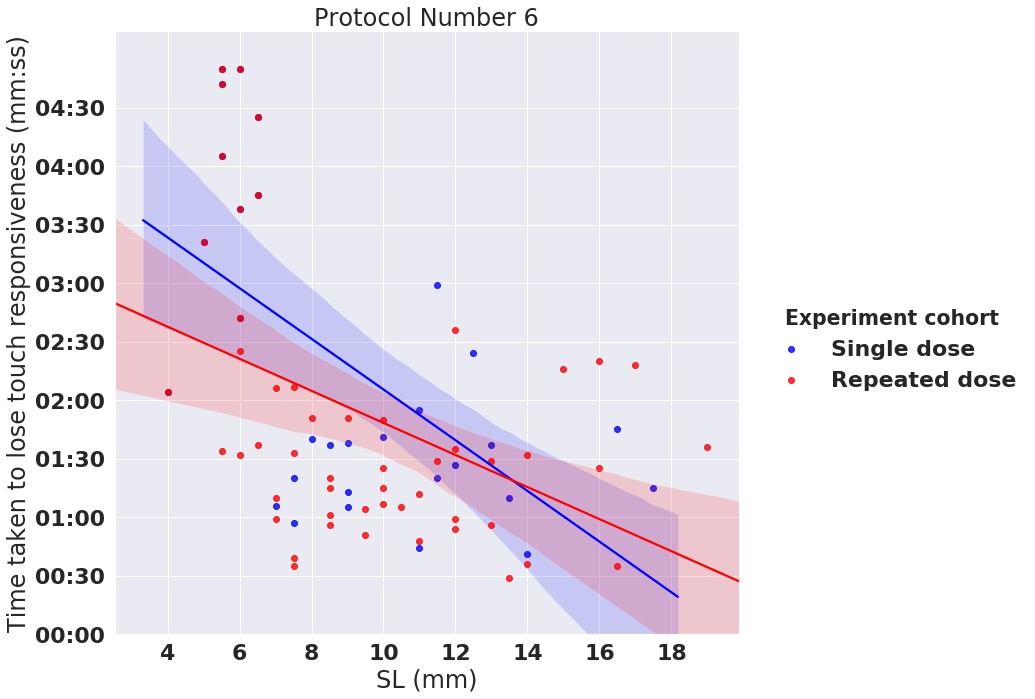

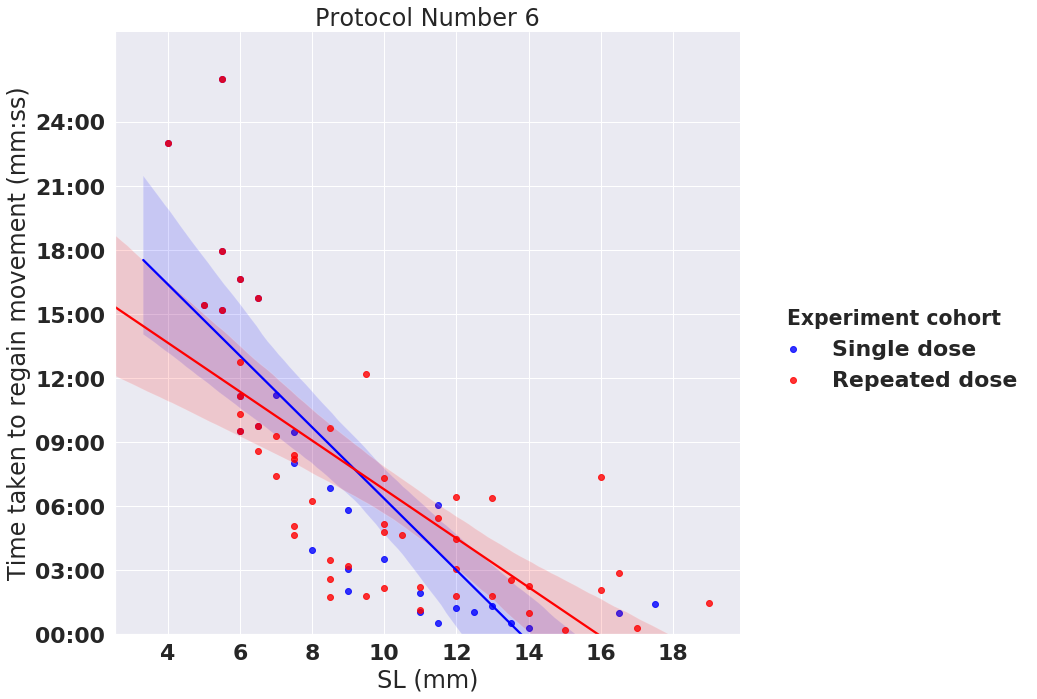

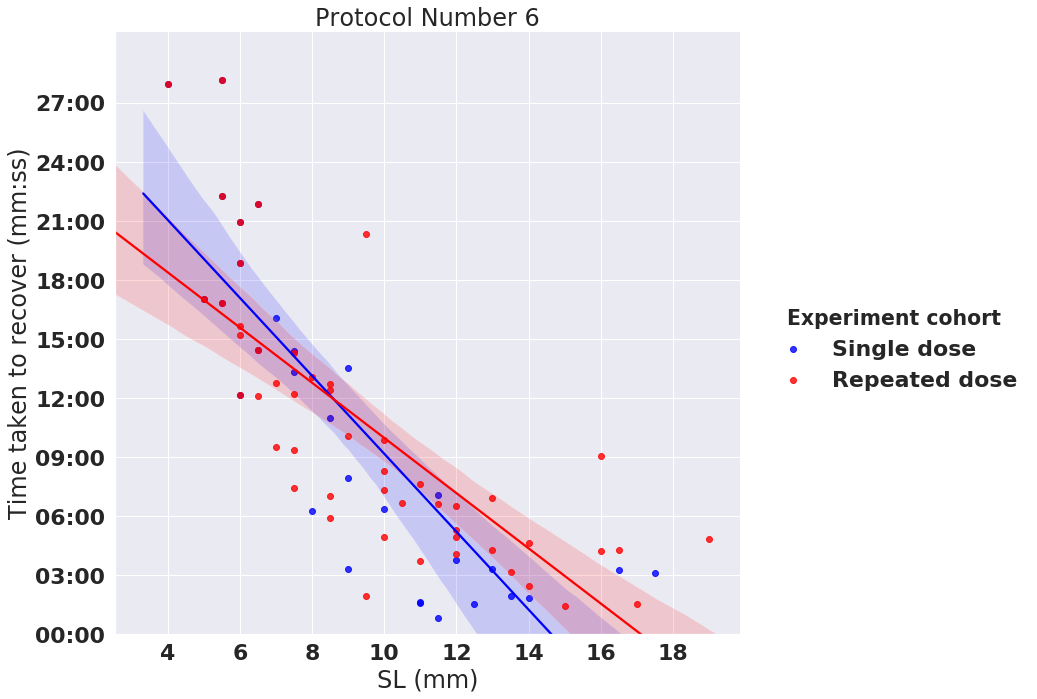

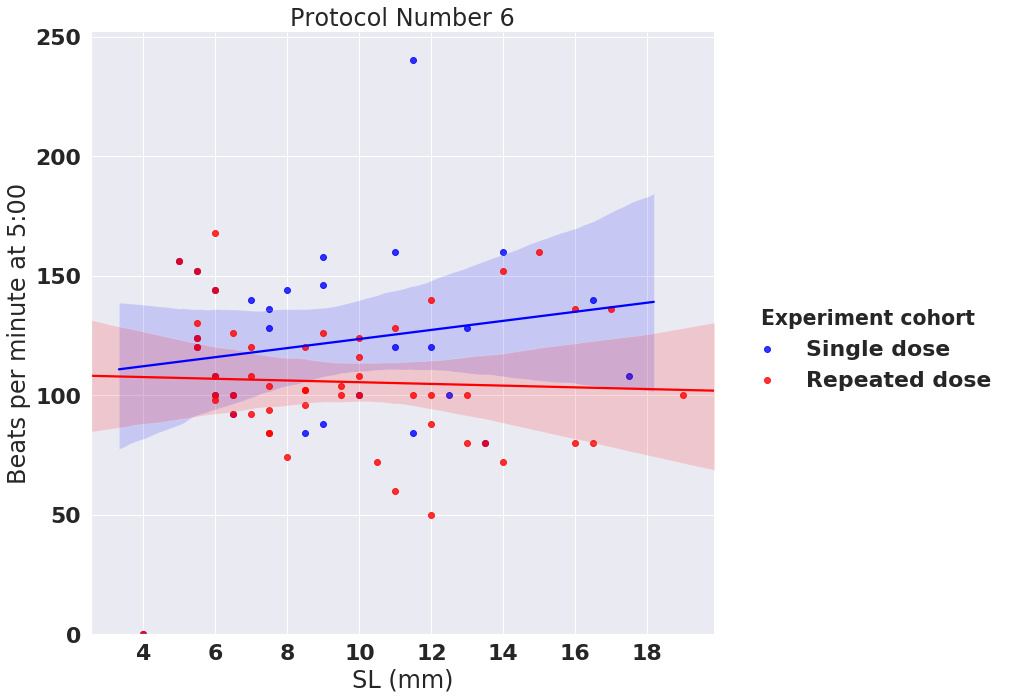

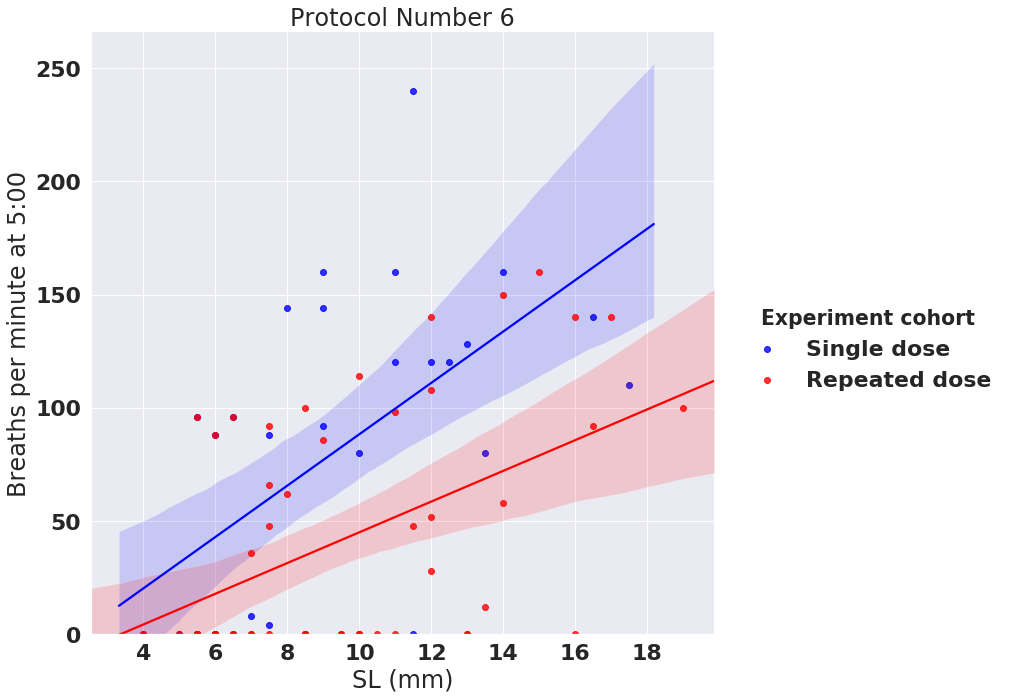

In [11]:
#Generates all my plots and statistical studies.
protocol = ['1','4','5','6']

#Convert to seconds
for j in protocol:
    print(j)
    p_df=df[df.P==j]
    
    for i,k in [('Induction_time_sec', 'Induction time (mm:ss)'),('Lose_TR_time_sec', 'Time taken to lose touch responsiveness (mm:ss)'),('TT_movement_sec', 'Time taken to regain movement (mm:ss)'),('TT_Recovery_sec','Time taken to recover (mm:ss)'),('RR_beats','Beats per minute at 5:00'),('RR_breaths', 'Breaths per minute at 5:00')]:
        
        for inc_control in ['_with_control','_without_control']:
        
        
            if inc_control=='_without_control':
            #Drop data points where repeat number is 1 as control
                My_df = p_df.drop(p_df[(p_df.Repeat_no < 2) &  (p_df.Age > 21)].index)
            else:
                My_df= p_df
            
            #Just for plots
            My_df=My_df.drop(My_df[(My_df.Exp=="Single dose") &  (My_df.Age == 21)].index)
        
            ##Protocol number vs ....
        
            ##STATISTICAL SIGNIFICANCE SECTION
            #See if there is a significant difference between any repeat numbers 
            save_rep=[]
            t_mat=np.zeros((7,7))
            p_mat=np.zeros((7,7))
            
            for rep_no in np.arange(1,7):
                rep_df=My_df.query('Repeat_no == @rep_no')
                #save_rep contains the list of values in column 'i' for each repeat number.
                save_rep.append(rep_df[i])
            
            for rep_i in np.arange(0,6):
                for rep_j in np.arange(0,6):
                    #All combinations of significance saved into an array!
                    t_ij,p_ij=stats.ttest_ind(save_rep[rep_i],save_rep[rep_j], nan_policy='omit')
                    t_mat[rep_i,rep_j]=t_ij
                    p_mat[rep_i,rep_j]=p_ij
            
            #PLOT FIGURE
            fig, axes = plt.subplots(figsize=(10,8))
            sns.set(font_scale=2)
            tips = My_df.dropna(how='all')
            ax=sns.boxplot(x="Repeat_no", y=i, data=tips)
            # add swarmplot
            ax=sns.swarmplot(x="Repeat_no", y=i, data=tips, color='black', alpha=0.75)
            
            #CHANGE TITLE
            if inc_control=='_without_control':
            #Drop data points where repeat number is 1 as control
                ax.set(title='Protocol Number '+j)
            else:
                ax.set(title='Protocol Number '+j+inc_control.replace('_', ' '))
            
            #CHANGE AESTHETICS
            #Changes the colours used in the boxplot
            colors = sns.color_palette('bright',n_colors=6)
            for artist,color in zip(ax.artists,colors):
                artist.set_facecolor(color)
                artist.set_edgecolor(color)
            
            
            #Define y limit and increments.
            if i!='RR_beats' and i!='RR_breaths':
                data_max=np.int(np.round(max(p_df[i]))/60)
                if data_max>9:
                    #If greater than 9 then change the increment size.
                    #in minutes
                    inc=np.int(np.round(max(p_df[i])/600))
                    #Extra space for *
                    y_lim_max=data_max+2*inc
                    y_actual_max=y_lim_max*60  
                elif data_max>=1:
                    #in minutes
                    inc=1
                    #Extra space for *
                    y_lim_max=data_max+2*inc
                    y_actual_max=y_lim_max*60
                else:
                    data_max=max(p_df[i])/60
                    inc=0.1
                    y_lim_max=data_max+2*inc
                    y_actual_max=y_lim_max*60 
                 
                inc_star=60*inc
            else:
                inc_star=max([np.int(max(p_df[i])/10),1])

            #PLOT STATISTICAL SIGNIFICANCE
            #Add statistical significance to the plot
            if inc_control=='_without_control':
                #Only test significance between subsequent repeat numbers
                for l in range(5):
                 #statistical annotation (plot * or  ns if not significant)
                    x1 = l
                    x2 = l+1   # columns 
                    #This is in seconds.
                    inc=max(p_df[i])/600
                    y, h, col = tips[i].max() + inc_star, inc_star/10, 'k'
                    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
                    plt.text((x1+x2)*.5, y+h, stars(p_mat[l,l+1]), ha='center', va='bottom', color=col)
                #Only test significance between 1 repeat and repeats>1
                for l in np.arange(1,5):
                 #statistical annotation (plot * or  ns if not significant)
                    x1 = 0
                    x2 = l+1   # columns 
                    y, h, col = tips[i].max() + inc_star*(l+1), inc_star/10, 'k'
                    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
                    plt.text((x1+x2)*.5, y+h, stars(p_mat[0,l+1]), ha='center', va='bottom', color=col)
            else:
                #Only test significance between 1 repeat and repeats>1
                for l in range(5):
                 #statistical annotation (plot * or  ns if not significant)
                    x1 = 0
                    x2 = l+1   # columns 
                    y, h, col = tips[i].max() + 100*(l+1), 1, 'k'
                    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
                    plt.text((x1+x2)*.5, y+h, stars(p_mat[0,l+1]), ha='center', va='bottom', color=col)
                
            
            
            if i!='RR_beats' and i!='RR_breaths':
                #Change the plot axis to time
                list=[]  
                if data_max>9:
                    if y_lim_max>=60:
                        ax.set(xlabel='Repeat Number', ylabel=k.replace('mm:ss','hh:mm:ss'))
                        #If greater than 60 then the time formatting needs to change
                        for time in np.arange(y_lim_max, step=inc):
                            if time>=60:
                                if 60-time<9:
                                    list.append('01:0'+str(np.int(time-60))+':00')
                                else:
                                    list.append('01:'+str(np.int(time-60))+':00')
                            elif time>9:
                                list.append('00:'+str(np.int(time))+':00')
                            else:
                                list.append('00:0'+str(np.int(time))+':00')
                    else:
                        ax.set(xlabel='Repeat Number', ylabel=k)
                        inc=np.int(inc)
                        for time in np.arange(y_lim_max, step=inc):
                            if time>9:
                                list.append(str(time)+':00')
                            else:
                                list.append('0'+str(time)+':00')
                    plt.yticks(np.arange(y_actual_max, step=inc*60), list)
                elif data_max>=1:
                    ax.set(xlabel='Repeat Number', ylabel=k)
                #For small values add :30 increments.
                    for time in np.arange(y_lim_max, step=1):
                        list.append('0'+str(time)+':00')
                        list.append('0'+str(time)+':30')
                    plt.yticks(np.arange(y_actual_max, step=30), list)
                else: # Less than 1 minute
                    ax.set(xlabel='Repeat Number', ylabel=k)
                    for time in np.arange(y_lim_max*60, step=10):
                        if time>0:
                            list.append('00:'+str(np.int(time)))   
                        else:
                            list.append('00:00') 
                    plt.yticks(np.arange(y_actual_max, step=10), list)
            else:
                ax.set(xlabel='Repeat Number', ylabel=k)
            
            plt.savefig(i+'Protocol_'+j+inc_control+'.png',bbox_inches='tight')
            plt.close(fig)
        
        #PLOTTING
        ##Size vs ....
        My_df= p_df
        tips = My_df.dropna(how='all')
        #Plots the data from the experimental cohort (the fish that were repeatedly anaesthetised, as well as the controls)
        ax=sns.pairplot(x_vars="SL", y_vars=i, data=tips, hue="Exp", hue_order = ["Single dose", "Repeated dose"], height=10, palette=['blue','red'],kind = 'reg')
        ax.set(xlabel='SL (mm)', ylabel=k)
        ax.set(title='Protocol Number '+j)
        ax._legend.set_title('Experiment cohort')
        
        ax.fig.set_size_inches(15,10)
        
       # for My_df , colour in [(p_df[p_df.Repeat_no==1],'black'), (p_df.drop(p_df[(p_df.Repeat_no <2) & (p_df.Age == 21)].index),'blue'),(p_df, 'grey')]:
        #Linear regression for SL v i with controls and repeated doses.
       #     tips = My_df.dropna(how='all')
            #Drop all empty rows 
       #     tips.dropna(subset=[i], inplace=True)
       #     X = tips['SL'].values.reshape(-1, 1)  # values converts it into a numpy array
       #     Y = tips[i].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
       #     linear_regressor = LinearRegression()  # create object for the class
       #     linear_regressor.fit(X, Y)  # perform linear regression
       #     Y_pred = linear_regressor.predict(X)  # make predictions
            #print(linear_regressor.summary)
       #     line, = plt.plot(X, Y_pred, color=colour)
        
        if i!='RR_beats' and i!='RR_breaths':
            #Change the plot axis to time
            list=[]
            additional_space=1
            y_lim_max=np.int(max(p_df[i])/60)+additional_space
            y_actual_max=y_lim_max*60
            if y_lim_max>9:
                #If greater than 9 then change the increment size.
                inc=max([np.int(np.round(y_lim_max/10)),1])
                if y_lim_max>=60:
                    ax.set(xlabel='SL (mm)', ylabel=k.replace('mm:ss','hh:mm:ss'))
                    #If greater than 60 then the time formatting needs to change
                    for time in np.arange(y_lim_max, step=inc):
                        if time>=60:
                            if 60-time<9:
                                list.append('01:0'+str(np.int(time-60))+':00')
                            else:
                                list.append('01:'+str(np.int(time-60))+':00')
                        elif time>9:
                            list.append('00:'+str(np.int(time))+':00')
                        else:
                            list.append('00:0'+str(np.int(time))+':00')
                else: #<60 but >9 
                    ax.set(xlabel='SL (mm)', ylabel=k)
                    for time in np.arange(y_lim_max, step=inc):
                        if time>9:
                            list.append(str(time)+':00')
                        else:
                            list.append('0'+str(time)+':00')
                plt.yticks(np.arange(y_actual_max, step=inc*60), list)
            elif y_lim_max>1:
                ax.set(xlabel='SL (mm)', ylabel=k)
                #For small values add :30 increments.
                for time in np.arange(y_lim_max, step=1):
                    list.append('0'+str(time)+':00')
                    list.append('0'+str(time)+':30')
                plt.yticks(np.arange(y_actual_max, step=30), list)
            else: # Less than 1 minute
                list.append('00:00')
                for time in np.arange(10,y_lim_max*60, step=10):
                    list.append('00:'+str(np.int(time)))   
                plt.yticks(np.arange(y_actual_max, step=10), list)    
        else:
            ax.set(xlabel='SL (mm)', ylabel=k)
        
        plt.ylim(ymin=0)

        
        
        plt.close(fig)

        
        plt.savefig('SL_'+i+'Protocol_'+j+'.png',bbox_inches='tight')
        #plt.savefig('SL_'+i+'Protocol_'+j+'.eps',bbox_inches='tight')
        

In [9]:
df = pd.read_csv('Results_part_2.csv')
df.head()

,P,Repeat_number,Fish_start,Fish_end,Survival_percent
0,1,1,10,10,100.0
1,4,1,10,10,100.0
2,5,1,10,10,100.0
3,6,1,10,10,100.0
4,1,2,10,10,100.0


ValueError: Could not interpret input 'Survival_percent'

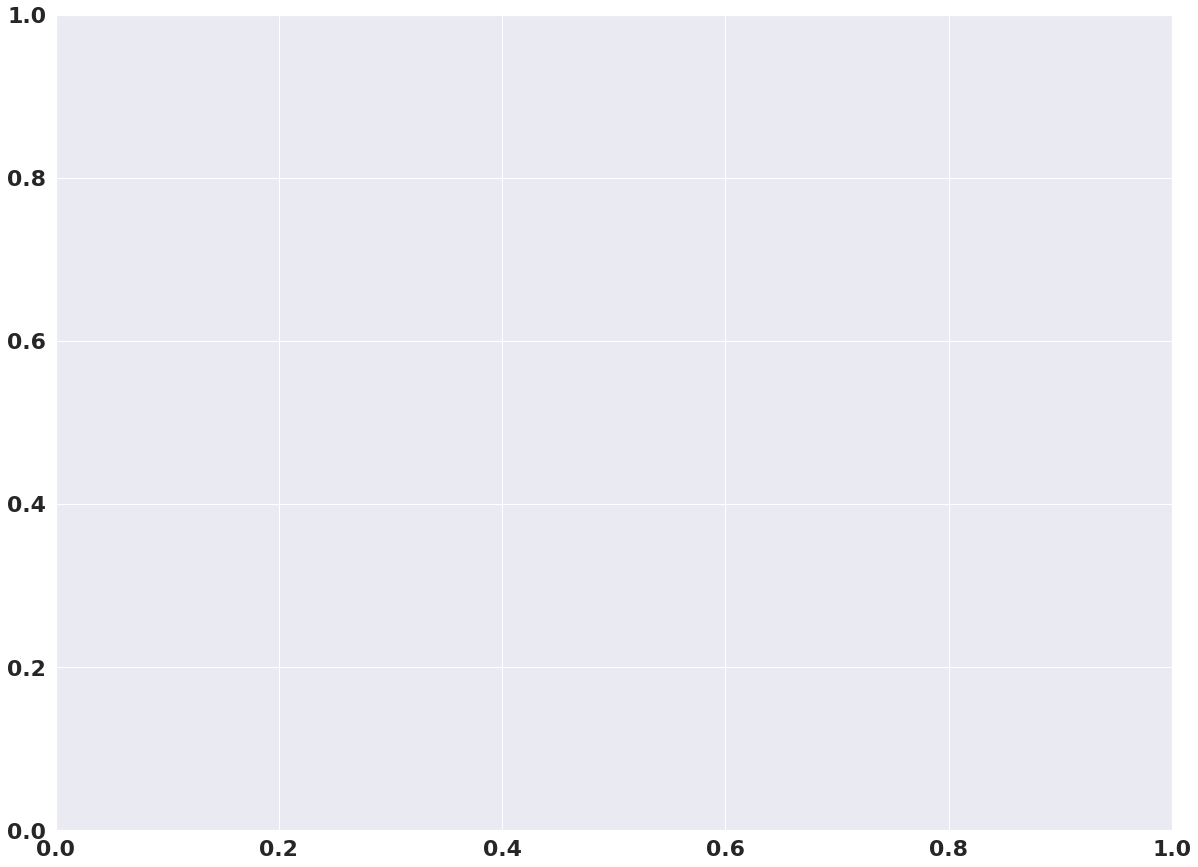

In [61]:
fig, axes = plt.subplots(figsize=(20, 15))

#Drop NA values
tips = df.dropna(how='all')       
ax=sns.barplot(y='Survival_percent', x='Repeat_no',data=tips, palette="Set1", hue='P')

ax.set_xlabel('Repeat number')
ax.set_ylabel('Percentage survival (%)')


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 40}

plt.rc('font', **font)

plt.savefig('Survival.png', bbox_inches='tight')
plt.savefig('Survival.eps', bbox_inches='tight')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


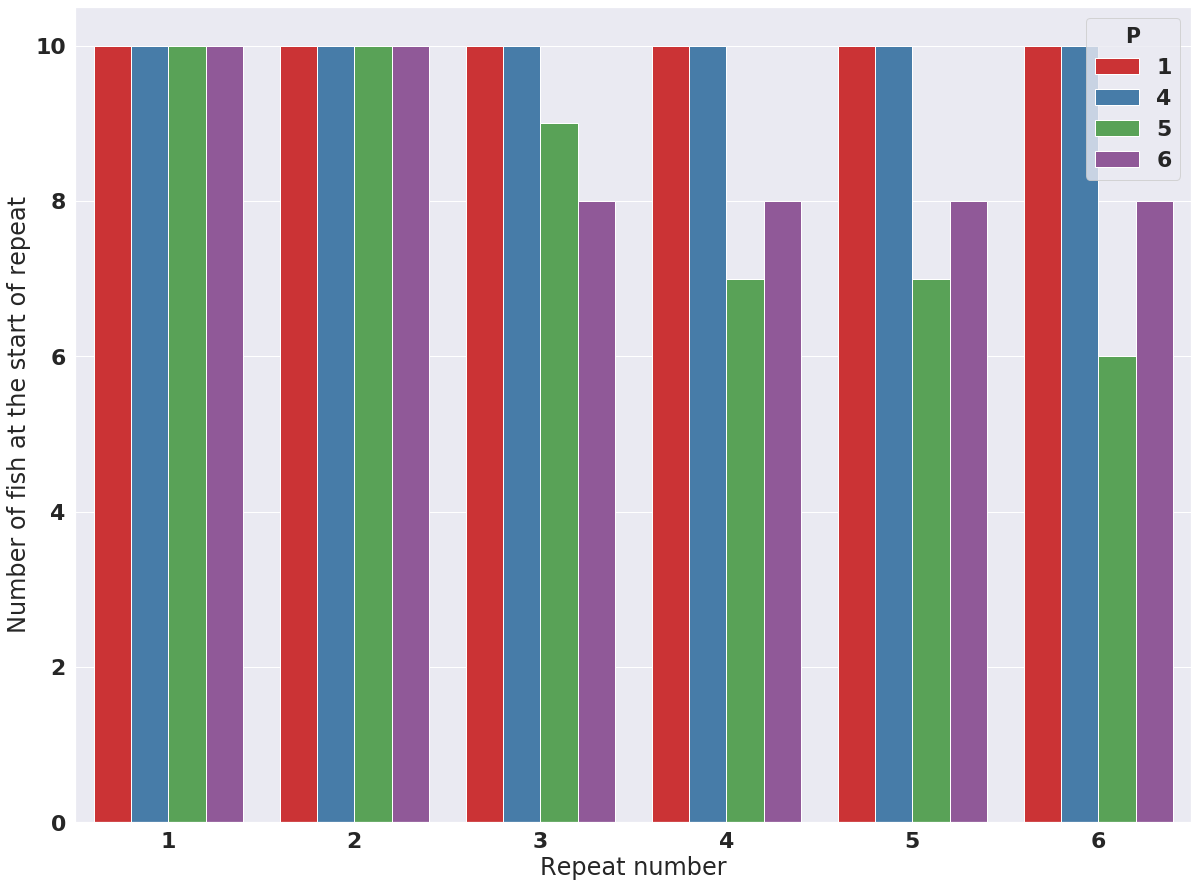

In [11]:
fig, axes = plt.subplots(figsize=(20, 15))

#Drop NA values
tips = df.dropna(how='all')       
ax=sns.barplot(y='Fish_start', x='Repeat_number',data=tips, palette="Set1", hue='P')

ax.set_xlabel('Repeat number')
ax.set_ylabel('Number of fish at the start of repeat')


font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 40}

plt.rc('font', **font)

plt.savefig('Number_of_fish.png', bbox_inches='tight')
plt.savefig('Number_of_fish.eps', bbox_inches='tight')

In [12]:
np.arange(1,5)

array([1, 2, 3, 4])

In [13]:
range(5)

range(0, 5)